# Corporación Favorita Grocery Sales Forecasting — Demand Prediction for Guayaquil, Guayas (Jan–Mar 2014)

### 1. Install Libraries

In [1]:
# 1: Install Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 6)

### 2. Load files in Google Drive

In [2]:
# 2: Load files
from google.colab import drive
import os
import gdown
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Set target folder path on Google Drive
drive_folder = '/content/drive/MyDrive/ts_project'
os.makedirs(drive_folder, exist_ok=True)

# File IDs for Google Drive files to download
file_ids = {
    "holiday_events": "1RMjSuqHXHTwAw_PGD5XVjhA3agaAGHDH",
    "items": "1ogMRixVhNY6XOJtIRtkRllyOyzw1nqya",
    "oil": "1Q59vk2v4WQ-Rpc9t2nqHcsZM3QWGFje_",
    "stores": "1Ei0MUXmNhmOcmrlPad8oklnFEDM95cDi",
    "transactions": "1PW5LnAEAiL43fI5CRDn_h6pgDG5rtBW_"
}

# Download smaller files directly into Google Drive folder
for file_name, file_id in file_ids.items():
    output_path = os.path.join(drive_folder, f"{file_name}.csv")
    if not os.path.exists(output_path):
        print(f"Downloading {file_name}.csv...")
        gdown.download(id=file_id, output=output_path, quiet=False)
        print(f"✓ {file_name}.csv downloaded successfully!")
    else:
        print(f"✓ {file_name}.csv already exists, skipping download.")

print("\n✓ All small files downloaded successfully!")

# ---- Handling large 'train.csv' ----

train_file_path = os.path.join(drive_folder, 'train.csv')
filtered_train_path = os.path.join(drive_folder, 'train_guayaquil.csv')
train_file_id = "1oEX8NEJPY7wPmSJ0n7lO1JUFYyZjFBRv"

# Download 'train.csv'
if not os.path.exists(train_file_path):
    print("Downloading train.csv... This might take a while. File is extremely large!")
    gdown.download(id=train_file_id, output=train_file_path, quiet=False)
else:
    print("✓ train.csv already exists, skipping download.")

# Load stores to identify Guayaquil store numbers
stores_df = pd.read_csv(os.path.join(drive_folder, 'stores.csv'))
guayaquil_store_nbrs = stores_df[
    (stores_df['city'] == 'Guayaquil') & (stores_df['state'] == 'Guayas')
]['store_nbr'].tolist()

# Filter large train.csv chunk-wise directly on Google Drive
chunksize = 500_000
filtered_chunks = []

print("Processing and filtering train.csv in chunks for Guayaquil stores...")
for chunk in pd.read_csv(train_file_path, chunksize=chunksize, parse_dates=['date']):
    filtered_chunk = chunk[chunk['store_nbr'].isin(guayaquil_store_nbrs)]
    filtered_chunks.append(filtered_chunk)

filtered_train = pd.concat(filtered_chunks)
filtered_train.to_csv(filtered_train_path, index=False)
print(f"✓ Filtered Guayaquil train data saved to {filtered_train_path}")


Mounted at /content/drive
✓ holiday_events.csv already exists, skipping download.
✓ items.csv already exists, skipping download.
✓ oil.csv already exists, skipping download.
✓ stores.csv already exists, skipping download.
✓ transactions.csv already exists, skipping download.

✓ All small files downloaded successfully!
✓ train.csv already exists, skipping download.
Processing and filtering train.csv in chunks for Guayaquil stores...
✓ Filtered Guayaquil train data saved to /content/drive/MyDrive/ts_project/train_guayaquil.csv


### 3. Load All Datasets

In [3]:
# 3: Load All Datasets
print("="*80)
print("LOADING DATASETS")
print("="*80)

print("\n Loading CSV files from Google Drive...\n")

# Load all datasets
train_guayaquil = pd.read_csv(
    os.path.join(drive_folder, 'train_guayaquil.csv'),
    parse_dates=['date']
)
print(f"✓ train_guayaquil.csv: {len(train_guayaquil):,} rows")

stores = pd.read_csv(os.path.join(drive_folder, 'stores.csv'))
print(f"✓ stores.csv: {len(stores):,} rows")

items = pd.read_csv(os.path.join(drive_folder, 'items.csv'))
print(f"✓ items.csv: {len(items):,} rows")

oil = pd.read_csv(
    os.path.join(drive_folder, 'oil.csv'),
    parse_dates=['date']
)
print(f"✓ oil.csv: {len(oil):,} rows")

holiday_events = pd.read_csv(
    os.path.join(drive_folder, 'holiday_events.csv'),
    parse_dates=['date']
)
print(f"✓ holiday_events.csv: {len(holiday_events):,} rows")

transactions = pd.read_csv(
    os.path.join(drive_folder, 'transactions.csv'),
    parse_dates=['date']
)
print(f"✓ transactions.csv: {len(transactions):,} rows")

# Filter stores for Guayaquil
guayaquil_stores = stores[
    (stores['city'] == 'Guayaquil') &
    (stores['state'] == 'Guayas')
]
guayaquil_store_nbrs = guayaquil_stores['store_nbr'].tolist()

print(f"\n Guayaquil Stores: {guayaquil_store_nbrs}")
print(f"   Total: {len(guayaquil_store_nbrs)} stores")

# Filter transactions for Guayaquil
transactions_guayaquil = transactions[
    transactions['store_nbr'].isin(guayaquil_store_nbrs)
]

print("\n" + "="*80)
print("DATA LOADING COMPLETE")
print("="*80)
print(f"\n Train Data (Guayaquil):")
print(f"   Shape: {train_guayaquil.shape}")
print(f"   Date range: {train_guayaquil['date'].min()} to {train_guayaquil['date'].max()}")
print(f"   Columns: {list(train_guayaquil.columns)}")

print(f"\n Stores: {guayaquil_stores.shape}")
print(f" Items: {items.shape}")
print(f" Holidays: {holiday_events.shape}")
print(f" Oil: {oil.shape}")
print(f" Transactions (Guayaquil): {transactions_guayaquil.shape}")

LOADING DATASETS

 Loading CSV files from Google Drive...

✓ train_guayaquil.csv: 16,710,676 rows
✓ stores.csv: 54 rows
✓ items.csv: 4,100 rows
✓ oil.csv: 1,218 rows
✓ holiday_events.csv: 350 rows
✓ transactions.csv: 83,488 rows

 Guayaquil Stores: [24, 26, 28, 29, 30, 32, 34, 51]
   Total: 8 stores

DATA LOADING COMPLETE

 Train Data (Guayaquil):
   Shape: (16710676, 6)
   Date range: 2013-01-02 00:00:00 to 2017-08-15 00:00:00
   Columns: ['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

 Stores: (8, 5)
 Items: (4100, 4)
 Holidays: (350, 6)
 Oil: (1218, 2)
 Transactions (Guayaquil): (12493, 3)


### 4. Data Preprocessing - Handle Missing Values and Basic Cleaning

In [4]:
# 4: Data Preprocessing
print("="*80)
print("DATA PREPROCESSING")
print("="*80)

print("\n[1/8] Checking for missing values...")
print("\nMissing values in train_guayaquil:")
print(train_guayaquil.isnull().sum())

print("\n[2/8] Handling negative sales (returns)...")
negative_sales = (train_guayaquil['unit_sales'] < 0).sum()
print(f"   Found {negative_sales:,} negative sales records")
train_guayaquil['unit_sales'] = train_guayaquil['unit_sales'].clip(lower=0)
print("   ✓ Clipped negative sales to 0")

print("\n[3/8] Creating time-based features...")
train_guayaquil['year'] = train_guayaquil['date'].dt.year
train_guayaquil['month'] = train_guayaquil['date'].dt.month
train_guayaquil['day'] = train_guayaquil['date'].dt.day
train_guayaquil['day_of_week'] = train_guayaquil['date'].dt.dayofweek
train_guayaquil['week_of_year'] = train_guayaquil['date'].dt.isocalendar().week
train_guayaquil['day_name'] = train_guayaquil['date'].dt.day_name()
train_guayaquil['quarter'] = train_guayaquil['date'].dt.quarter
print("   ✓ Time features created")

print("\n[4/8] Merging with items data...")
train_guayaquil = train_guayaquil.merge(
    items[['item_nbr', 'family', 'class', 'perishable']],
    on='item_nbr',
    how='left'
)
print(f"   ✓ Merged. Shape: {train_guayaquil.shape}")

print("\n[5/8] Merging with store information...")
train_guayaquil = train_guayaquil.merge(
    guayaquil_stores[['store_nbr', 'type', 'cluster']],
    on='store_nbr',
    how='left'
)
print(f"   ✓ Merged. Shape: {train_guayaquil.shape}")

print("\n[6/8] Processing holiday events...")
# Create holiday features
holiday_events['is_holiday'] = holiday_events['type'].isin(
    ['Holiday', 'Additional', 'Bridge']
).astype(int)
holiday_events['is_national_holiday'] = (
    (holiday_events['is_holiday'] == 1) &
    (holiday_events['locale'] == 'National')
).astype(int)
holiday_events['is_regional_holiday'] = (
    (holiday_events['is_holiday'] == 1) &
    (holiday_events['locale'] == 'Regional')
).astype(int)

# Merge holidays
train_guayaquil = train_guayaquil.merge(
    holiday_events[['date', 'is_holiday', 'is_national_holiday', 'is_regional_holiday']],
    on='date',
    how='left'
)
train_guayaquil['is_holiday'] = train_guayaquil['is_holiday'].fillna(0).astype(int)
train_guayaquil['is_national_holiday'] = train_guayaquil['is_national_holiday'].fillna(0).astype(int)
train_guayaquil['is_regional_holiday'] = train_guayaquil['is_regional_holiday'].fillna(0).astype(int)
print(f"   ✓ Holidays merged. Total holiday days: {train_guayaquil['is_holiday'].sum():,}")

print("\n[7/8] Merging oil prices...")
train_guayaquil = train_guayaquil.merge(oil, on='date', how='left')
# Forward fill missing oil prices
train_guayaquil['dcoilwtico'] = train_guayaquil.groupby('store_nbr')['dcoilwtico'].fillna(method='ffill')
train_guayaquil['dcoilwtico'] = train_guayaquil.groupby('store_nbr')['dcoilwtico'].fillna(method='bfill')
print(f"   ✓ Oil prices merged. Missing: {train_guayaquil['dcoilwtico'].isnull().sum()}")

print("\n[8/8] Merging transaction counts...")
train_guayaquil = train_guayaquil.merge(
    transactions_guayaquil[['date', 'store_nbr', 'transactions']],
    on=['date', 'store_nbr'],
    how='left'
)
missing_trans = train_guayaquil['transactions'].isnull().sum()
if missing_trans > 0:
    train_guayaquil['transactions'] = train_guayaquil.groupby('store_nbr')['transactions'].transform(
        lambda x: x.fillna(x.median())
    )
print(f"   ✓ Transactions merged. Missing filled: {missing_trans:,}")

print("\n✅ Preprocessing complete!")
print(f"   Final shape: {train_guayaquil.shape}")

DATA PREPROCESSING

[1/8] Checking for missing values...

Missing values in train_guayaquil:
id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    2925336
dtype: int64

[2/8] Handling negative sales (returns)...
   Found 1,021 negative sales records
   ✓ Clipped negative sales to 0

[3/8] Creating time-based features...
   ✓ Time features created

[4/8] Merging with items data...
   ✓ Merged. Shape: (16710676, 16)

[5/8] Merging with store information...
   ✓ Merged. Shape: (16710676, 18)

[6/8] Processing holiday events...
   ✓ Holidays merged. Total holiday days: 2,124,418

[7/8] Merging oil prices...
   ✓ Oil prices merged. Missing: 0

[8/8] Merging transaction counts...
   ✓ Transactions merged. Missing filled: 19,819

✅ Preprocessing complete!
   Final shape: (17039400, 23)


### 5. Feature Engineering

In [5]:
# 5: Feature Engineering
print("="*80)
print("FEATURE ENGINEERING")
print("="*80)

print("\n[1/6] Creating payday features...")
# Ecuador payday: 15th and last day of month
train_guayaquil['is_payday'] = (
    (train_guayaquil['day'] == 15) |
    (train_guayaquil['day'] == train_guayaquil['date'].dt.days_in_month)
).astype(int)

def days_to_next_payday(row):
    day = row['day']
    days_in_month = row['date'].days_in_month

    if day < 15:
        dist_15 = 15 - day
    else:
        dist_15 = (days_in_month - day) + 15

    dist_eom = days_in_month - day if day < days_in_month else 0

    return min(dist_15, dist_eom)

train_guayaquil['days_to_payday'] = train_guayaquil.apply(days_to_next_payday, axis=1)
train_guayaquil['is_payday_week'] = (train_guayaquil['days_to_payday'] <= 3).astype(int)
print(f"   ✓ Payday features created. Payday dates: {train_guayaquil['is_payday'].sum():,}")

print("\n[2/6] Creating weekend flag...")
train_guayaquil['is_weekend'] = (train_guayaquil['day_of_week'] >= 5).astype(int)
print(f"   ✓ Weekend flag created. Weekend days: {train_guayaquil['is_weekend'].sum():,}")

print("\n[3/6] Creating month start/end flags...")
train_guayaquil['is_month_start'] = (train_guayaquil['day'] <= 5).astype(int)
train_guayaquil['is_month_end'] = (
    train_guayaquil['day'] >= train_guayaquil['date'].dt.days_in_month - 4
).astype(int)
print("   ✓ Month position flags created")

print("\n[4/6] Processing promotion flag...")
# Handle onpromotion field (might be True/False or 0/1)
if train_guayaquil['onpromotion'].dtype == 'object':
    train_guayaquil['onpromotion'] = train_guayaquil['onpromotion'].map(
        {'True': 1, 'False': 0, 'T': 1, 'F': 0, True: 1, False: 0}
    )
train_guayaquil['onpromotion'] = train_guayaquil['onpromotion'].fillna(0).astype(int)
print(f"   ✓ Promotion flag processed. Promoted items: {train_guayaquil['onpromotion'].sum():,}")

print("\n[5/6] Checking data quality...")
print("\nMissing values after feature engineering:")
missing = train_guayaquil.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
     print("   ✓ No missing values!")

print("\n[6/6] Saving processed data...")
processed_path = os.path.join(drive_folder, 'train_guayaquil_processed.csv')
train_guayaquil.to_csv(processed_path, index=False)
print(f"   ✓ Saved to: {processed_path}")

print("\n✅ Feature engineering complete!")
print(f"   Total features: {len(train_guayaquil.columns)}")
print(f"   Features: {list(train_guayaquil.columns)}")

FEATURE ENGINEERING

[1/6] Creating payday features...
   ✓ Payday features created. Payday dates: 1,132,583

[2/6] Creating weekend flag...
   ✓ Weekend flag created. Weekend days: 5,231,492

[3/6] Creating month start/end flags...
   ✓ Month position flags created

[4/6] Processing promotion flag...
   ✓ Promotion flag processed. Promoted items: 1,118,408

[5/6] Checking data quality...

Missing values after feature engineering:
   ✓ No missing values!

[6/6] Saving processed data...
   ✓ Saved to: /content/drive/MyDrive/ts_project/train_guayaquil_processed.csv

✅ Feature engineering complete!
   Total features: 29
   Features: ['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'year', 'month', 'day', 'day_of_week', 'week_of_year', 'day_name', 'quarter', 'family', 'class', 'perishable', 'type', 'cluster', 'is_holiday', 'is_national_holiday', 'is_regional_holiday', 'dcoilwtico', 'transactions', 'is_payday', 'days_to_payday', 'is_payday_week', 'is_weekend', 'is_month_

### 6. Exploratory Data Analysis (EDA)

EXPLORATORY DATA ANALYSIS

[1/5] Overall sales trend...


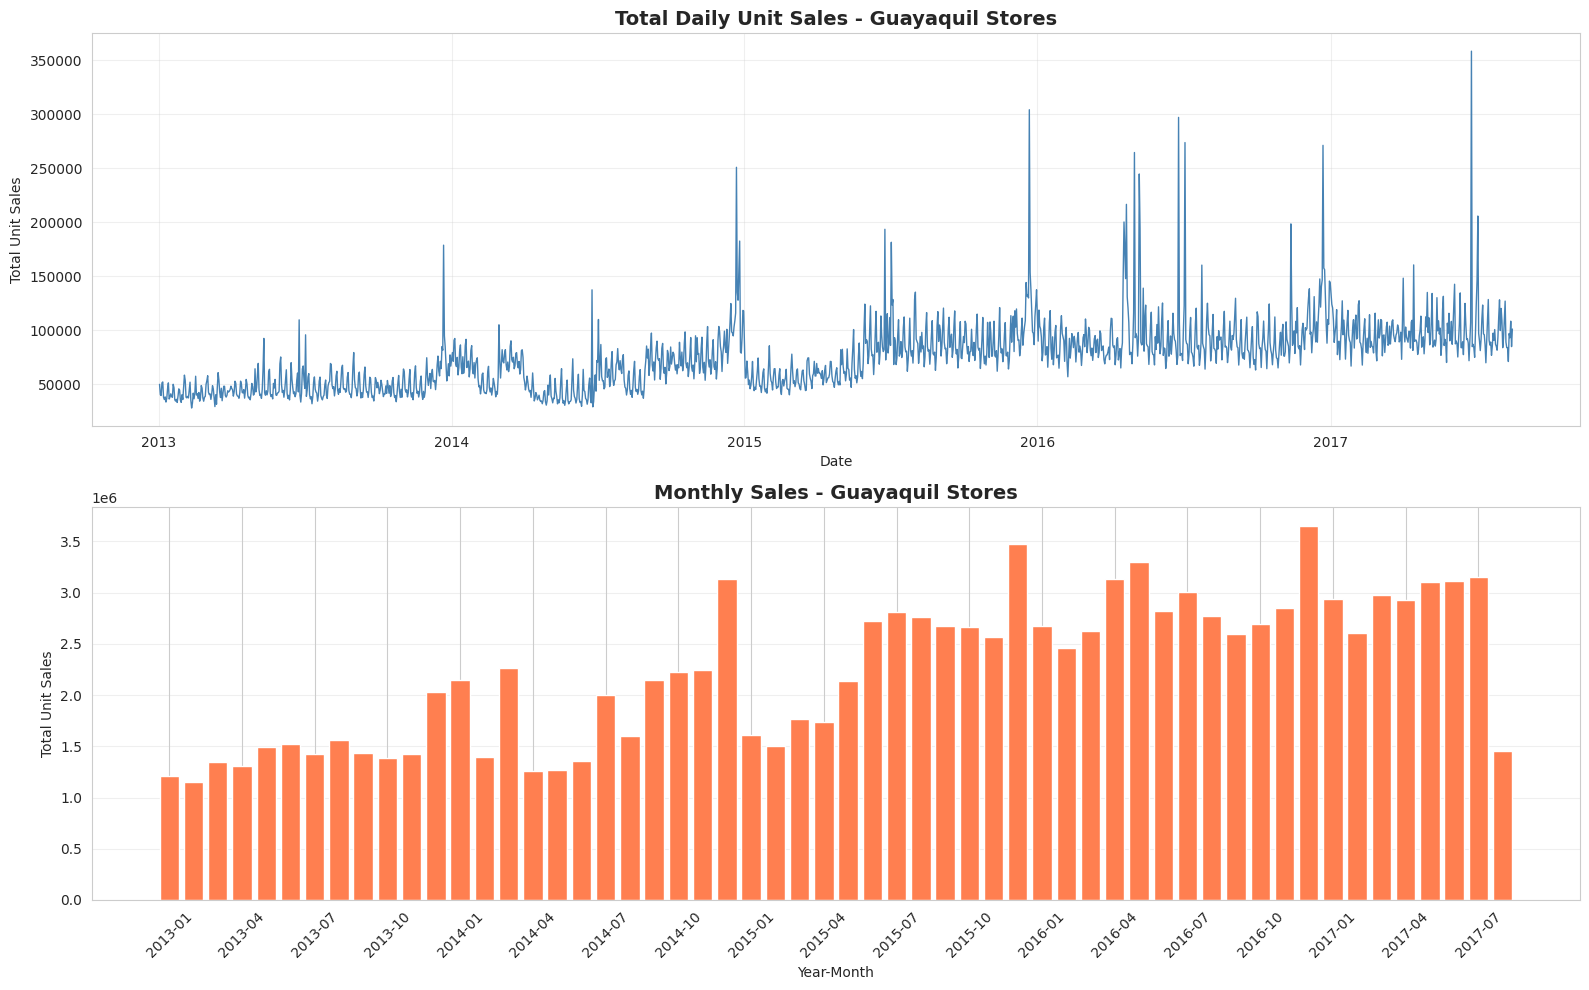


[2/5] Seasonality patterns...


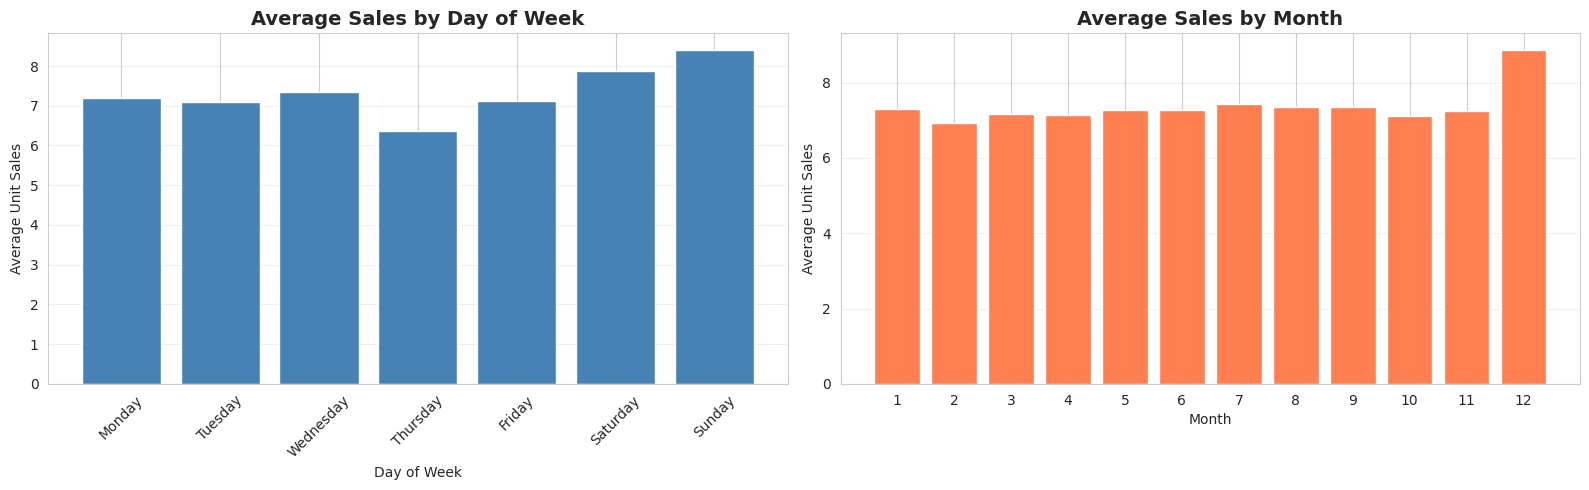


[3/5] Store and product family analysis...


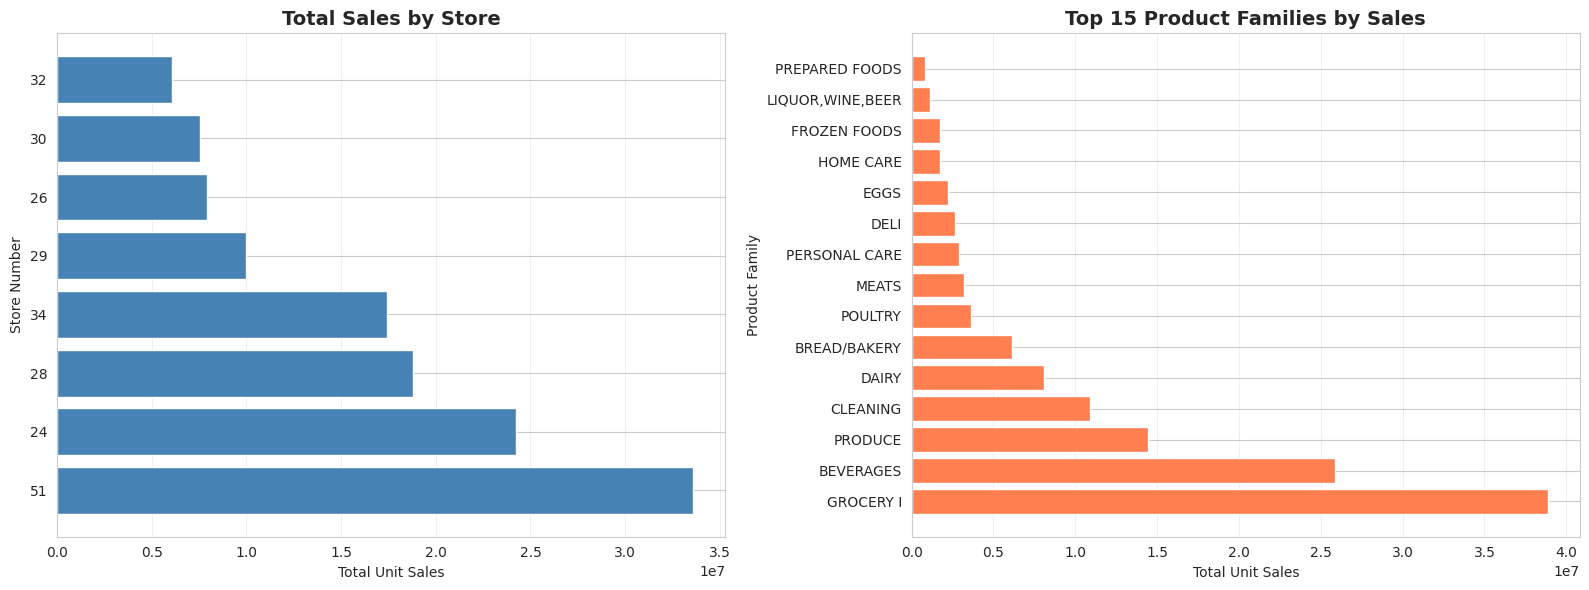


Top 5 Product Families:
       family    unit_sales
12  GROCERY I  3.889288e+07
3   BEVERAGES  2.584838e+07
30    PRODUCE  1.445396e+07
7    CLEANING  1.092044e+07
8       DAIRY  8.089276e+06

[4/5] Promotion impact analysis...

Promotion Impact:
    onpromotion       mean  median           sum
0  No Promotion   7.032713     3.0  1.119678e+08
1  On Promotion  12.178674     5.0  1.362073e+07


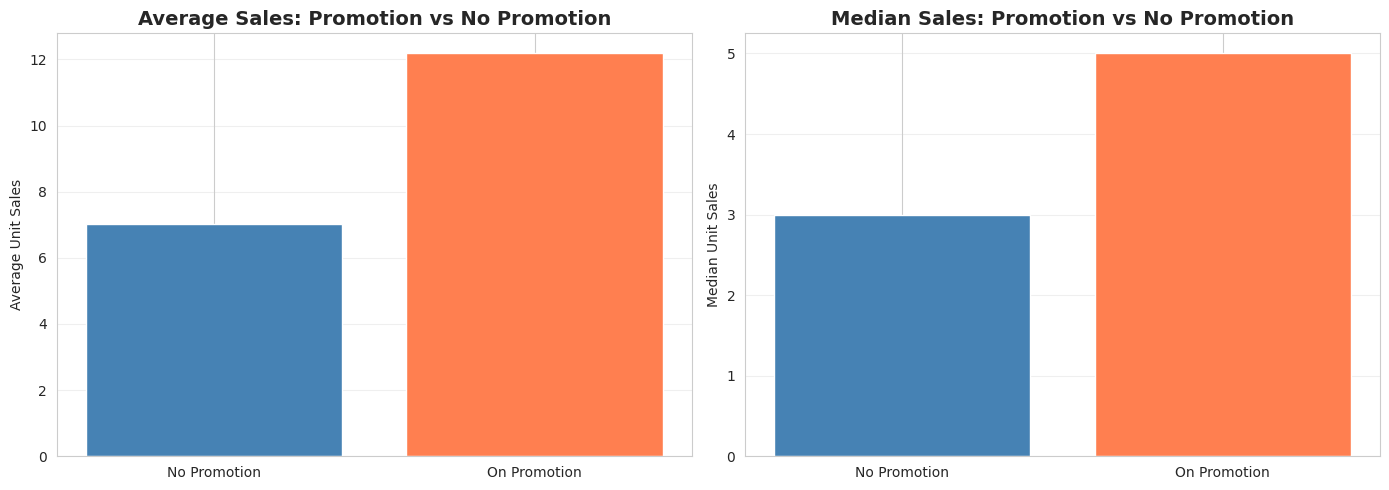


[5/5] Holiday and payday impact...


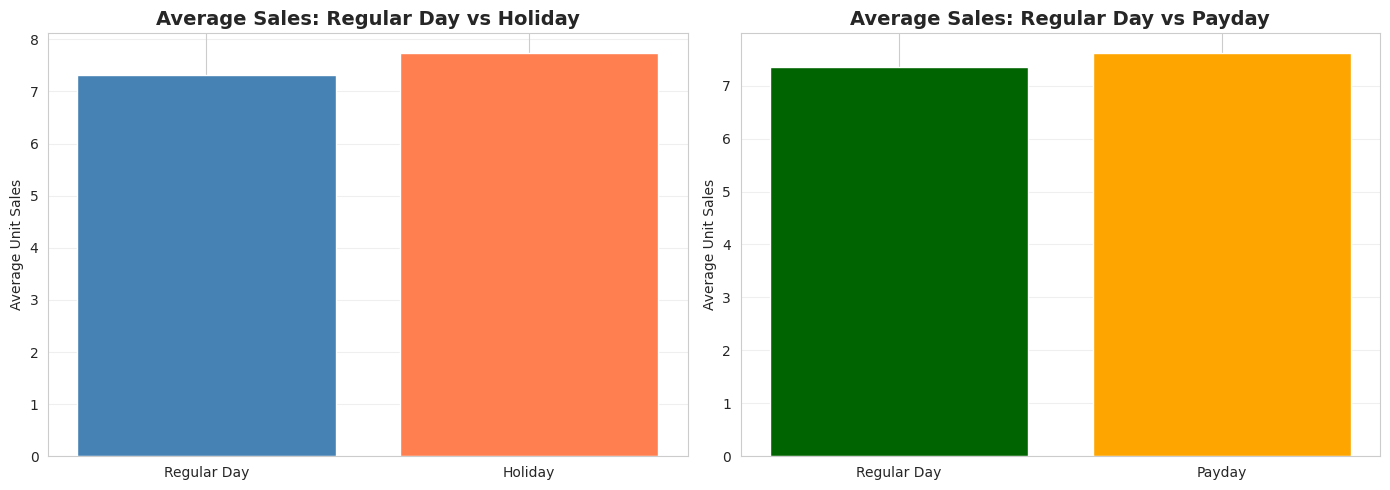


✅ EDA complete!


In [6]:
# 6: Exploratory Data Analysis
print("="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1. Overall sales trend
print("\n[1/5] Overall sales trend...")
daily_sales = train_guayaquil.groupby('date')['unit_sales'].sum().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

axes[0].plot(daily_sales['date'], daily_sales['unit_sales'], linewidth=1, color='steelblue')
axes[0].set_title('Total Daily Unit Sales - Guayaquil Stores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Unit Sales')
axes[0].grid(True, alpha=0.3)

# Monthly aggregation
monthly_sales = train_guayaquil.groupby(['year', 'month'])['unit_sales'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

axes[1].bar(range(len(monthly_sales)), monthly_sales['unit_sales'], color='coral')
axes[1].set_title('Monthly Sales - Guayaquil Stores', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Total Unit Sales')
axes[1].set_xticks(range(0, len(monthly_sales), 3))
axes[1].set_xticklabels(monthly_sales['year_month'].iloc[::3], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 2. Seasonality patterns
print("\n[2/5] Seasonality patterns...")
dow_sales = train_guayaquil.groupby('day_name')['unit_sales'].mean().reset_index()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales['day_name'] = pd.Categorical(dow_sales['day_name'], categories=dow_order, ordered=True)
dow_sales = dow_sales.sort_values('day_name')

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(dow_sales['day_name'], dow_sales['unit_sales'], color='steelblue')
axes[0].set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Unit Sales')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

monthly_avg = train_guayaquil.groupby('month')['unit_sales'].mean().reset_index()
axes[1].bar(monthly_avg['month'], monthly_avg['unit_sales'], color='coral')
axes[1].set_title('Average Sales by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Unit Sales')
axes[1].set_xticks(range(1, 13))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 3. Store and family analysis
print("\n[3/5] Store and product family analysis...")
store_sales = train_guayaquil.groupby('store_nbr')['unit_sales'].sum().reset_index()
store_sales = store_sales.sort_values('unit_sales', ascending=False)

family_sales = train_guayaquil.groupby('family')['unit_sales'].sum().reset_index()
family_sales = family_sales.sort_values('unit_sales', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(store_sales['store_nbr'].astype(str), store_sales['unit_sales'], color='steelblue')
axes[0].set_title('Total Sales by Store', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Unit Sales')
axes[0].set_ylabel('Store Number')
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(family_sales['family'], family_sales['unit_sales'], color='coral')
axes[1].set_title('Top 15 Product Families by Sales', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Unit Sales')
axes[1].set_ylabel('Product Family')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 5 Product Families:")
print(family_sales.head())

# 4. Promotion impact
print("\n[4/5] Promotion impact analysis...")
promo_comparison = train_guayaquil.groupby('onpromotion')['unit_sales'].agg(['mean', 'median', 'sum']).reset_index()
promo_comparison['onpromotion'] = promo_comparison['onpromotion'].map({0: 'No Promotion', 1: 'On Promotion'})

print("\nPromotion Impact:")
print(promo_comparison)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(promo_comparison['onpromotion'], promo_comparison['mean'], color=['steelblue', 'coral'])
axes[0].set_title('Average Sales: Promotion vs No Promotion', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Unit Sales')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(promo_comparison['onpromotion'], promo_comparison['median'], color=['steelblue', 'coral'])
axes[1].set_title('Median Sales: Promotion vs No Promotion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Median Unit Sales')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 5. Holiday and payday impact
print("\n[5/5] Holiday and payday impact...")
holiday_comparison = train_guayaquil.groupby('is_holiday')['unit_sales'].mean().reset_index()
holiday_comparison['is_holiday'] = holiday_comparison['is_holiday'].map({0: 'Regular Day', 1: 'Holiday'})

payday_comparison = train_guayaquil.groupby('is_payday')['unit_sales'].mean().reset_index()
payday_comparison['is_payday'] = payday_comparison['is_payday'].map({0: 'Regular Day', 1: 'Payday'})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(holiday_comparison['is_holiday'], holiday_comparison['unit_sales'], color=['steelblue', 'coral'])
axes[0].set_title('Average Sales: Regular Day vs Holiday', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Unit Sales')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(payday_comparison['is_payday'], payday_comparison['unit_sales'], color=['darkgreen', 'orange'])
axes[1].set_title('Average Sales: Regular Day vs Payday', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Unit Sales')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ EDA complete!")

### 7. Train/Test Split For Forecasting

In [7]:
# 7: Train/Test Split for Forecasting
print("="*80)
print("TRAIN/TEST SPLIT")
print("="*80)

# Forecast period: Jan-Mar 2014
forecast_start = '2014-01-01'
forecast_end = '2014-03-31'

# Split data
train_data = train_guayaquil[train_guayaquil['date'] < forecast_start].copy()
forecast_dates = pd.date_range(start=forecast_start, end=forecast_end, freq='D')

print(f"\n Training Period:")
print(f"   Start: {train_data['date'].min().strftime('%Y-%m-%d')}")
print(f"   End: {train_data['date'].max().strftime('%Y-%m-%d')}")
print(f"   Total days: {(train_data['date'].max() - train_data['date'].min()).days + 1}")
print(f"   Total records: {len(train_data):,}")

print(f"\n Forecast Period:")
print(f"   Start: {forecast_start}")
print(f"   End: {forecast_end}")
print(f"   Total days to forecast: {len(forecast_dates)}")

print(f"\n Training Data Statistics:")
print(f"   Unique stores: {train_data['store_nbr'].nunique()}")
print(f"   Unique items: {train_data['item_nbr'].nunique():,}")
print(f"   Unique families: {train_data['family'].nunique()}")
print(f"   Total sales: {train_data['unit_sales'].sum():,.0f}")

# Save train data
train_final_path = os.path.join(drive_folder, 'train_final.csv')
train_data.to_csv(train_final_path, index=False)
print(f"\n✓ Training data saved to: {train_final_path}")

# Save metadata
import json
forecast_metadata = {
    'forecast_start': forecast_start,
    'forecast_end': forecast_end,
    'forecast_days': len(forecast_dates),
    'train_start': train_data['date'].min().strftime('%Y-%m-%d'),
    'train_end': train_data['date'].max().strftime('%Y-%m-%d'),
    'train_days': (train_data['date'].max() - train_data['date'].min()).days + 1,
    'train_records': len(train_data),
    'stores': guayaquil_store_nbrs
}

metadata_path = os.path.join(drive_folder, 'forecast_metadata.json')
with open(metadata_path, 'w') as f:
    json.dump(forecast_metadata, f, indent=2)

print(f"✓ Metadata saved to: {metadata_path}")

print("\n✅ Train/test split complete!")

TRAIN/TEST SPLIT

 Training Period:
   Start: 2013-01-02
   End: 2013-12-31
   Total days: 364
   Total records: 2,246,205

 Forecast Period:
   Start: 2014-01-01
   End: 2014-03-31
   Total days to forecast: 90

 Training Data Statistics:
   Unique stores: 7
   Unique items: 1,961
   Unique families: 22
   Total sales: 17,291,075

✓ Training data saved to: /content/drive/MyDrive/ts_project/train_final.csv
✓ Metadata saved to: /content/drive/MyDrive/ts_project/forecast_metadata.json

✅ Train/test split complete!


### 8. Aggregate Data for Modeling

In [8]:
# 8: Aggregate Data to Store-Family Level
print("="*80)
print("DATA AGGREGATION FOR MODELING")
print("="*80)

print("\n Aggregating to Store-Family-Date level...")
print("   (This reduces complexity while maintaining key patterns)\n")

# Aggregate to Store-Family-Date level
agg_data = train_data.groupby(['date', 'store_nbr', 'family']).agg({
    'unit_sales': 'sum',
    'onpromotion': 'sum',
    'transactions': 'first',
    'dcoilwtico': 'first',
    'is_holiday': 'max',
    'is_national_holiday': 'max',
    'is_payday': 'max',
    'is_weekend': 'max',
    'day_of_week': 'first',
    'month': 'first',
    'year': 'first',
    'quarter': 'first',
    'perishable': 'max'
}).reset_index()

print(f"✓ Aggregated data shape: {agg_data.shape}")
print(f"   Unique store-family combinations: {len(agg_data.groupby(['store_nbr', 'family']))}")

# Save aggregated data
agg_path = os.path.join(drive_folder, 'agg_store_family.csv')
agg_data.to_csv(agg_path, index=False)
print(f"✓ Saved to: {agg_path}")

# Select top store-family combinations for modeling
print("\n Selecting top store-family combinations...")
store_family_sales = train_data.groupby(['store_nbr', 'family'])['unit_sales'].sum().reset_index()
store_family_sales = store_family_sales.sort_values('unit_sales', ascending=False)

print("\nTop 10 Store-Family combinations by total sales:")
print(store_family_sales.head(10))

# Select top 3 for detailed modeling
top_combinations = store_family_sales.head(3)

print("\n✓ Selected top 3 combinations for modeling:")
for idx, row in top_combinations.iterrows():
    print(f"   Store {row['store_nbr']} - {row['family']}: {row['unit_sales']:,.0f} total sales")

# Save selection
selected_combinations = top_combinations[['store_nbr', 'family']].to_dict('records')
selection_path = os.path.join(drive_folder, 'selected_combinations.json')

import json
with open(selection_path, 'w') as f:
    json.dump(selected_combinations, f, indent=2)

print(f"\n✓ Selection saved to: {selection_path}")
print("\n✅ Data aggregation complete!")

DATA AGGREGATION FOR MODELING

 Aggregating to Store-Family-Date level...
   (This reduces complexity while maintaining key patterns)

✓ Aggregated data shape: (46582, 16)
   Unique store-family combinations: 148
✓ Saved to: /content/drive/MyDrive/ts_project/agg_store_family.csv

 Selecting top store-family combinations...

Top 10 Store-Family combinations by total sales:
     store_nbr     family  unit_sales
135         51  GROCERY I   1655171.0
9           24  GROCERY I   1394241.0
114         34  GROCERY I   1335476.0
53          28  GROCERY I   1006085.0
128         51  BEVERAGES    964147.0
2           24  BEVERAGES    671469.0
31          26  GROCERY I    619987.0
130         51   CLEANING    503414.0
94          32  GROCERY I    490743.0
74          30  GROCERY I    471808.0

✓ Selected top 3 combinations for modeling:
   Store 51 - GROCERY I: 1,655,171 total sales
   Store 24 - GROCERY I: 1,394,241 total sales
   Store 34 - GROCERY I: 1,335,476 total sales

✓ Selection saved to

### 9. Install Required Libraries for Modeling

In [9]:
# 9: Install Required Libraries
print("="*80)
print("INSTALLING MODELING LIBRARIES")
print("="*80)

print("\n Installing required packages...\n")

# Install packages
!pip install -q prophet --ignore-installed blinker
!pip install -q lightgbm --ignore-installed blinker
!pip install -q mlflow --ignore-installed blinker


print("✓ All libraries installed successfully!")

# Import libraries
import lightgbm as lgb
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import mlflow

print("✓ Libraries imported successfully!")

INSTALLING MODELING LIBRARIES

 Installing required packages...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 175.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 152.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 152.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 181.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.1

### 10. Evaluation Metrics Functions

In [10]:
# 10: Define Evaluation Functions
print("="*80)
print("DEFINING EVALUATION FUNCTIONS")
print("="*80)

def evaluate_forecast(y_true, y_pred, model_name="Model"):
    """Calculate comprehensive forecast metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # MAPE (handle zeros)
    mask = y_true != 0
    if mask.sum() > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        mape = np.nan

    # MASE (Mean Absolute Scaled Error)
    naive_forecast = np.roll(y_true, 1)
    naive_forecast[0] = y_true[0]
    mae_naive = mean_absolute_error(y_true, naive_forecast)
    mase = mae / mae_naive if mae_naive != 0 else np.nan

    metrics = {
        'model': model_name,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'mase': mase
    }

    return metrics

def print_metrics(metrics):
    """Pretty print metrics"""
    print(f"\n{'='*60}")
    print(f"Model: {metrics['model']}")
    print(f"{'='*60}")
    print(f"MAE (Mean Absolute Error):        {metrics['mae']:>12,.2f}")
    print(f"RMSE (Root Mean Squared Error):   {metrics['rmse']:>12,.2f}")
    print(f"MAPE (Mean Abs Percentage Error): {metrics['mape']:>12.2f}%")
    print(f"MASE (Mean Abs Scaled Error):     {metrics['mase']:>12.4f}")
    print(f"{'='*60}")

print("✓ Evaluation functions defined!")

DEFINING EVALUATION FUNCTIONS
✓ Evaluation functions defined!


### 11. Prepare Example Store-Family for Modeling

PREPARING DATA FOR MODELING

 Selected: Store 51 - GROCERY I

 Data shape: (363, 16)
   Date range: 2013-01-02 00:00:00 to 2013-12-31 00:00:00
   Total records: 363


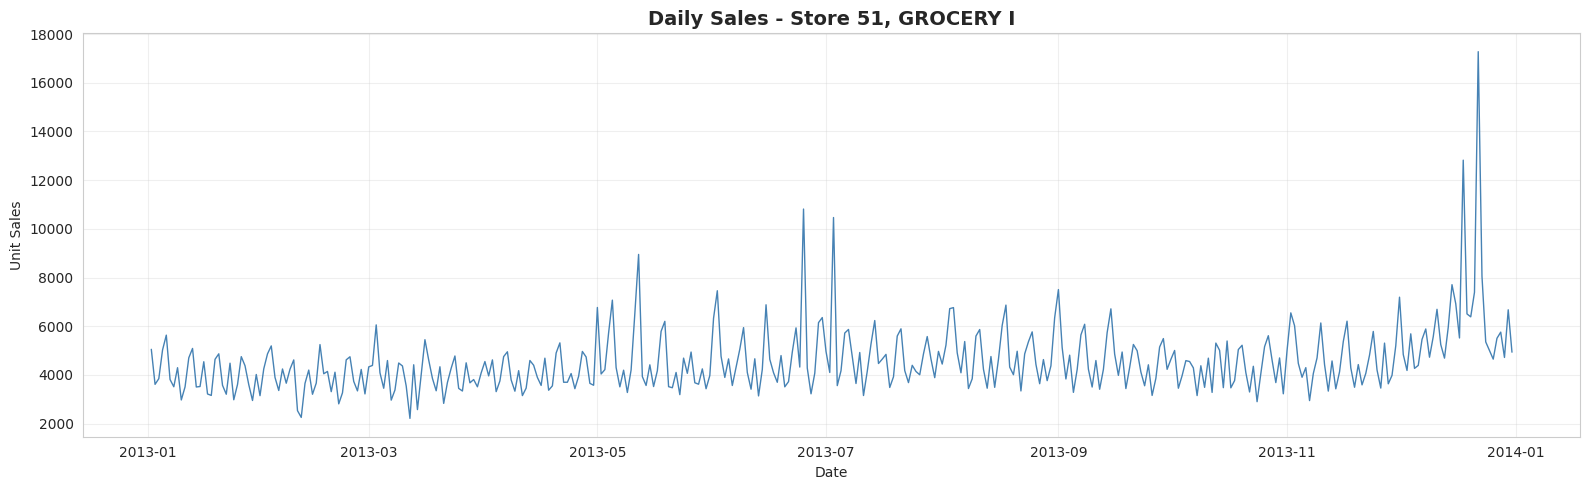


 Sales Statistics:
count      363.000000
mean      4559.699725
std       1390.690591
min       2214.000000
25%       3656.000000
50%       4300.000000
75%       4999.500000
max      17276.000000
Name: unit_sales, dtype: float64

 Train-Validation Split:
   Training: 2013-01-02 00:00:00 to 2013-10-01 00:00:00 (273 days)
   Validation: 2013-10-02 00:00:00 to 2013-12-31 00:00:00 (90 days)


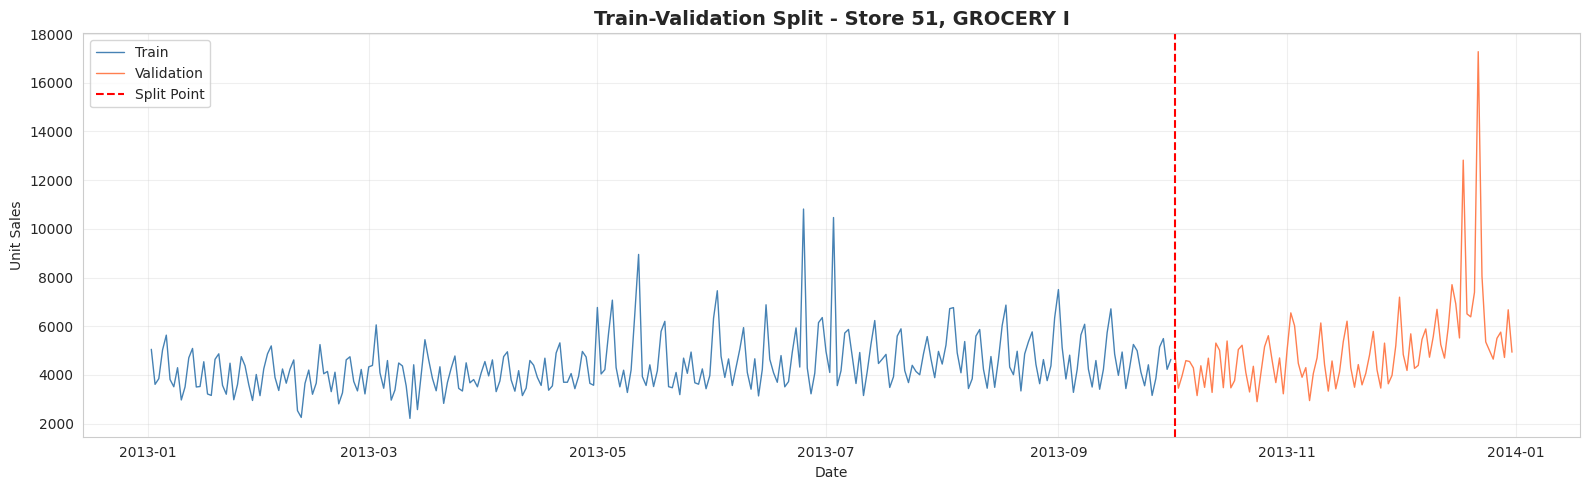


✅ Data prepared for modeling!


In [11]:
# 11: Prepare Data for First Combination
print("="*80)
print("PREPARING DATA FOR MODELING")
print("="*80)

# Use the top combination
example_store = int(top_combinations.iloc[0]['store_nbr'])
example_family = top_combinations.iloc[0]['family']

print(f"\n Selected: Store {example_store} - {example_family}")

# Filter data for this combination
combo_data = agg_data[
    (agg_data['store_nbr'] == example_store) &
    (agg_data['family'] == example_family)
].copy()

combo_data = combo_data.sort_values('date').reset_index(drop=True)

print(f"\n Data shape: {combo_data.shape}")
print(f"   Date range: {combo_data['date'].min()} to {combo_data['date'].max()}")
print(f"   Total records: {len(combo_data)}")

# Plot the time series
plt.figure(figsize=(16, 5))
plt.plot(combo_data['date'], combo_data['unit_sales'], linewidth=1, color='steelblue')
plt.title(f'Daily Sales - Store {example_store}, {example_family}', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n Sales Statistics:")
print(combo_data['unit_sales'].describe())

# Create validation split (last 90 days as validation)
val_days = 90
val_start_date = combo_data['date'].max() - timedelta(days=val_days)

train_set = combo_data[combo_data['date'] < val_start_date].copy()
val_set = combo_data[combo_data['date'] >= val_start_date].copy()

print(f"\n Train-Validation Split:")
print(f"   Training: {train_set['date'].min()} to {train_set['date'].max()} ({len(train_set)} days)")
print(f"   Validation: {val_set['date'].min()} to {val_set['date'].max()} ({len(val_set)} days)")

# Visualize split
plt.figure(figsize=(16, 5))
plt.plot(train_set['date'], train_set['unit_sales'], label='Train', linewidth=1, color='steelblue')
plt.plot(val_set['date'], val_set['unit_sales'], label='Validation', linewidth=1, color='coral')
plt.axvline(x=val_start_date, color='red', linestyle='--', label='Split Point')
plt.title(f'Train-Validation Split - Store {example_store}, {example_family}', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Data prepared for modeling!")

### 12. Model 1 - Baseline (Naive Seasonal)

MODEL 1: NAIVE SEASONAL BASELINE

 Generating baseline predictions...

Model: Naive Seasonal Baseline
MAE (Mean Absolute Error):              978.61
RMSE (Root Mean Squared Error):       1,874.30
MAPE (Mean Abs Percentage Error):        16.41%
MASE (Mean Abs Scaled Error):           0.7003


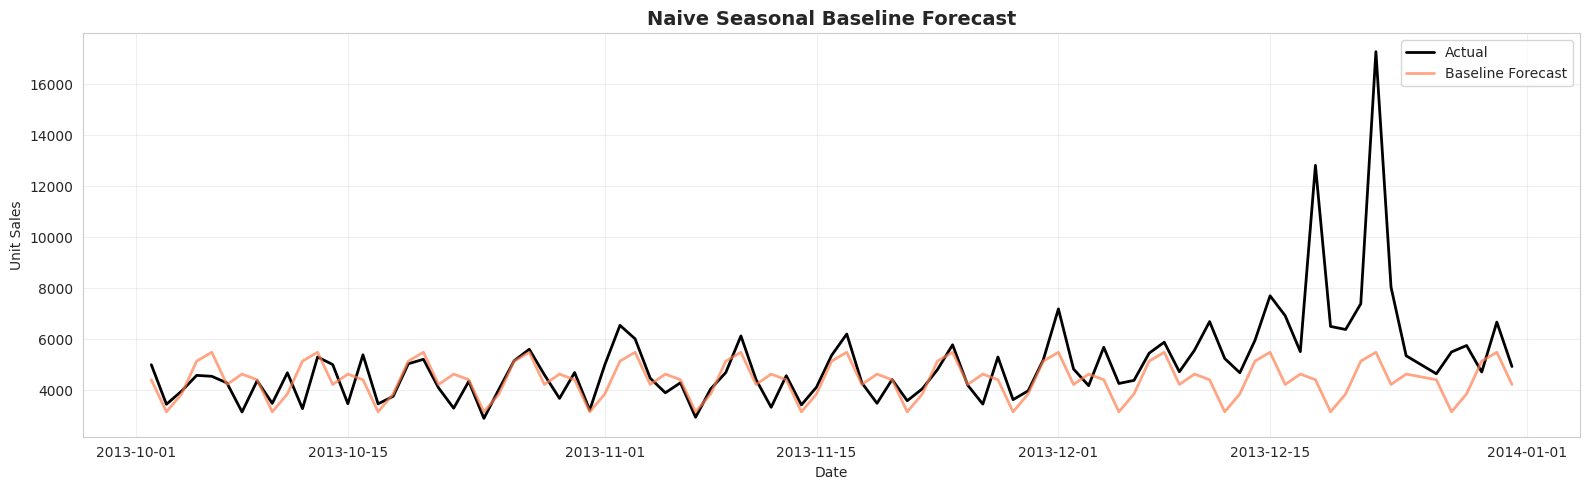


✅ Baseline model complete!


In [12]:
# Cell 12: Model 1 - Naive Seasonal Baseline
print("="*80)
print("MODEL 1: NAIVE SEASONAL BASELINE")
print("="*80)

def naive_seasonal_forecast(train_df, forecast_days):
    """7-day naive seasonal forecast (last week's same day)"""
    predictions = []

    for i in range(forecast_days):
        # Use value from 7 days ago
        if i < 7:
            idx = len(train_df) - 7 + i
            pred = train_df.iloc[idx]['unit_sales']
        else:
            pred = predictions[i - 7]

        predictions.append(pred)

    return np.array(predictions)

# Generate baseline predictions
print("\n Generating baseline predictions...")
baseline_pred = naive_seasonal_forecast(train_set, len(val_set))

# Evaluate
baseline_metrics = evaluate_forecast(
    val_set['unit_sales'].values,
    baseline_pred,
    "Naive Seasonal Baseline"
)
print_metrics(baseline_metrics)

# Visualize
plt.figure(figsize=(16, 5))
plt.plot(val_set['date'], val_set['unit_sales'], label='Actual', linewidth=2, color='black')
plt.plot(val_set['date'], baseline_pred, label='Baseline Forecast', linewidth=2, color='coral', alpha=0.7)
plt.title('Naive Seasonal Baseline Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Baseline model complete!")

### 13. Model 2 - Prophet

MODEL 2: PROPHET

 Preparing data for Prophet...
   Training samples: 273
   Holidays: 249

 Training Prophet model...
✓ Model trained!

 Generating forecasts...

Model: Prophet
MAE (Mean Absolute Error):            4,690.36
RMSE (Root Mean Squared Error):       5,388.65
MAPE (Mean Abs Percentage Error):        99.08%
MASE (Mean Abs Scaled Error):           3.3564


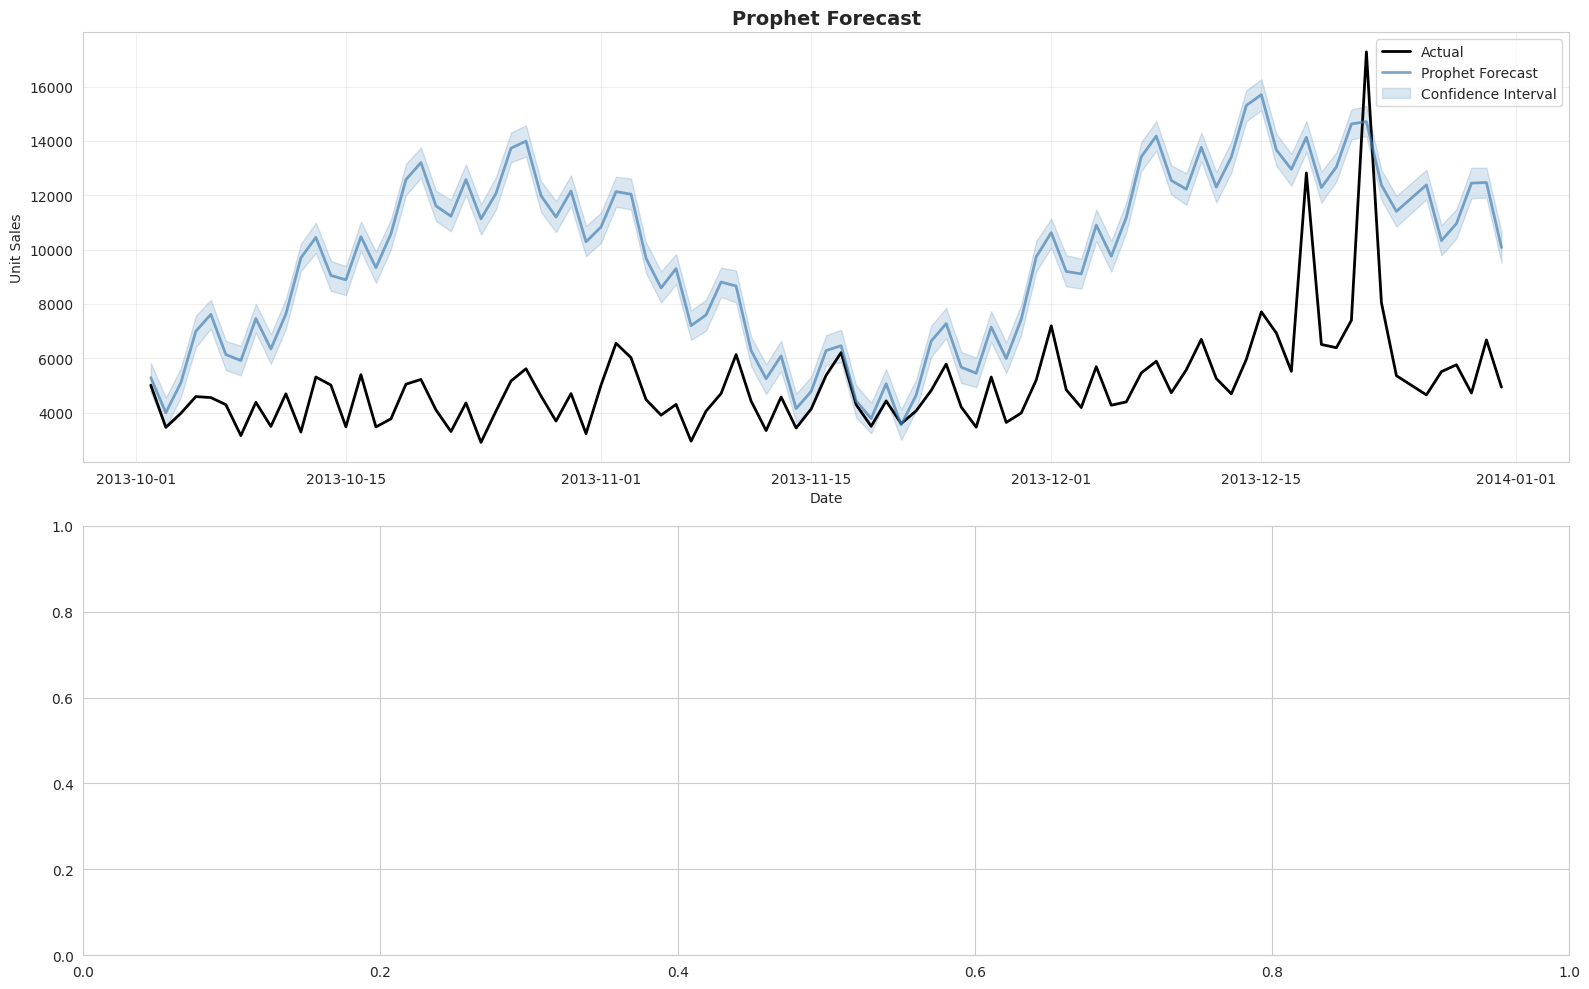


 Forecast Components:


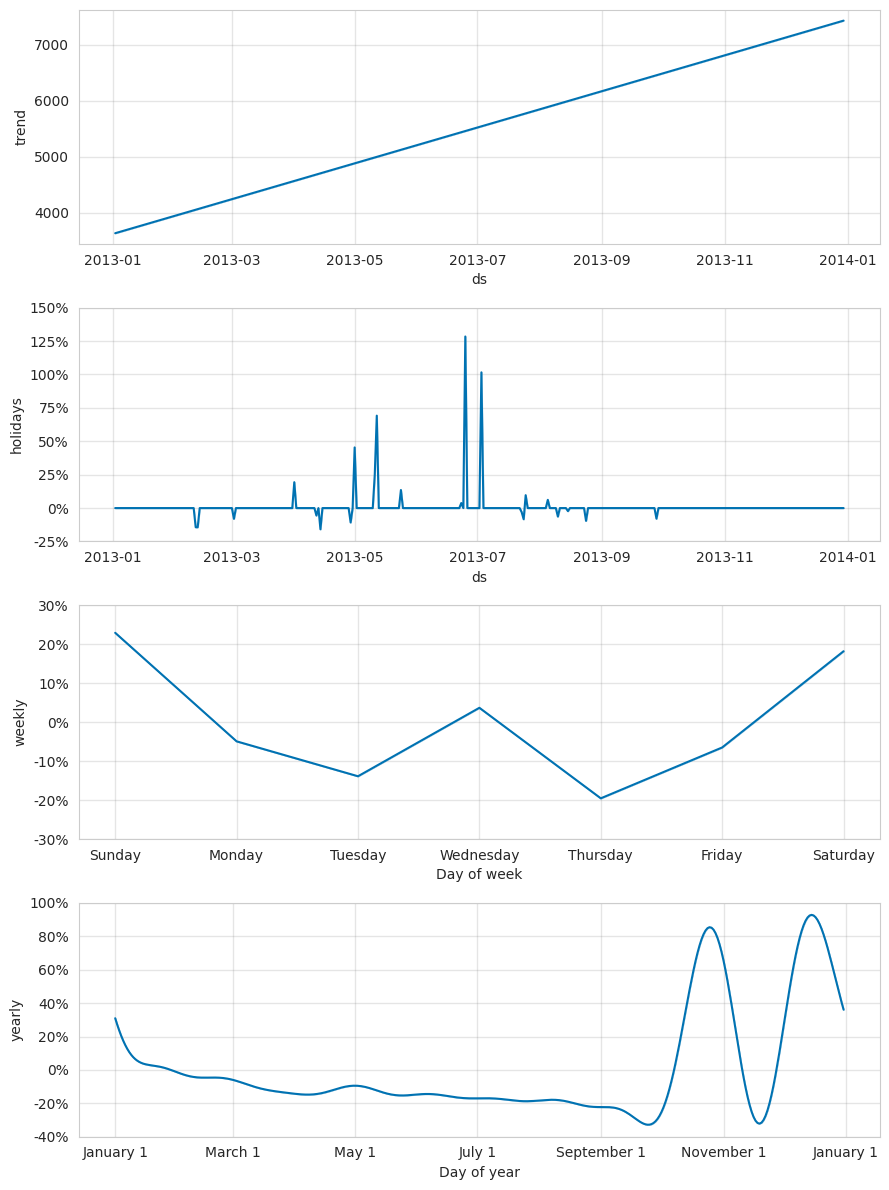


✅ Prophet model complete!


In [13]:
# 13: Model 2 - Prophet (Facebook) - FIXED
print("="*80)
print("MODEL 2: PROPHET")
print("="*80)

print("\n Preparing data for Prophet...")
# Prepare data for Prophet
prophet_train = train_set[['date', 'unit_sales']].copy()
prophet_train.columns = ['ds', 'y']

# Add holidays
prophet_holidays = holiday_events[holiday_events['is_holiday'] == 1][['date', 'description']].copy()
prophet_holidays.columns = ['ds', 'holiday']
prophet_holidays = prophet_holidays.drop_duplicates(subset=['ds'])

print(f"   Training samples: {len(prophet_train)}")
print(f"   Holidays: {len(prophet_holidays)}")

# Create and fit model
print("\n Training Prophet model...")
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=prophet_holidays,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)

prophet_model.fit(prophet_train)
print("✓ Model trained!")

# Make predictions
print("\n Generating forecasts...")
future = prophet_model.make_future_dataframe(periods=len(val_set), freq='D')
forecast = prophet_model.predict(future)

# Extract validation predictions
prophet_pred = forecast.tail(len(val_set))['yhat'].values
prophet_pred = np.clip(prophet_pred, 0, None)  # Clip negative predictions

# Evaluate
prophet_metrics = evaluate_forecast(
    val_set['unit_sales'].values,
    prophet_pred,
    "Prophet"
)
print_metrics(prophet_metrics)

# Visualize - FIXED VERSION
fig = plt.figure(figsize=(16, 10))

# Create main forecast plot
ax1 = plt.subplot(2, 1, 1)
ax1.plot(val_set['date'], val_set['unit_sales'], label='Actual', linewidth=2, color='black')
ax1.plot(val_set['date'], prophet_pred, label='Prophet Forecast', linewidth=2, color='steelblue', alpha=0.7)
ax1.fill_between(
    val_set['date'],
    forecast.tail(len(val_set))['yhat_lower'].values,
    forecast.tail(len(val_set))['yhat_upper'].values,
    alpha=0.2,
    color='steelblue',
    label='Confidence Interval'
)
ax1.set_title('Prophet Forecast', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unit Sales')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Components plot - Create separately
plt.subplot(2, 1, 2)
# Prophet plot_components subplots, create new figure
plt.tight_layout()
plt.show()

# Show components in a separate figure
print("\n Forecast Components:")
fig_components = prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

print("\n✅ Prophet model complete!")

### 14. Feature Engineering for LightGBM

In [14]:
# 14: Feature Engineering for LightGBM
print("="*80)
print("FEATURE ENGINEERING FOR LIGHTGBM")
print("="*80)

def create_lag_features(df, target_col='unit_sales', lags=[1, 7, 14, 28]):
    """Create lag features"""
    df = df.copy()
    for lag in lags:
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    return df

def create_rolling_features(df, target_col='unit_sales', windows=[7, 14, 28]):
    """Create rolling window features"""
    df = df.copy()
    for window in windows:
        df[f'rolling_mean_{window}'] = df[target_col].shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df[target_col].shift(1).rolling(window=window).std()
        df[f'rolling_min_{window}'] = df[target_col].shift(1).rolling(window=window).min()
        df[f'rolling_max_{window}'] = df[target_col].shift(1).rolling(window=window).max()
    return df

print("\n Creating lag features...")
lgb_data = combo_data.copy()
lgb_data = create_lag_features(lgb_data, lags=[1, 7, 14, 28])

print(" Creating rolling features...")
lgb_data = create_rolling_features(lgb_data, windows=[7, 14, 28])

# Drop rows with NaN
lgb_data = lgb_data.dropna()
print(f"\n✓ Features created. Shape after dropping NaN: {lgb_data.shape}")

# Define feature columns
feature_cols = [
    'day_of_week', 'month', 'year', 'quarter',
    'onpromotion', 'is_holiday', 'is_payday', 'is_weekend',
    'is_national_holiday', 'dcoilwtico', 'transactions',
    'lag_1', 'lag_7', 'lag_14', 'lag_28',
    'rolling_mean_7', 'rolling_std_7', 'rolling_min_7', 'rolling_max_7',
    'rolling_mean_14', 'rolling_std_14', 'rolling_min_14', 'rolling_max_14',
    'rolling_mean_28', 'rolling_std_28', 'rolling_min_28', 'rolling_max_28'
]

print(f"\n Total features: {len(feature_cols)}")

# Split train/validation
lgb_train = lgb_data[lgb_data['date'] < val_start_date].copy()
lgb_val = lgb_data[lgb_data['date'] >= val_start_date].copy()

X_train = lgb_train[feature_cols]
y_train = lgb_train['unit_sales']
X_val = lgb_val[feature_cols]
y_val = lgb_val['unit_sales']

print(f"\n LightGBM Data Split:")
print(f"   Training set: {X_train.shape}")
print(f"   Validation set: {X_val.shape}")

print("\n✅ Feature engineering complete!")

FEATURE ENGINEERING FOR LIGHTGBM

 Creating lag features...
 Creating rolling features...

✓ Features created. Shape after dropping NaN: (335, 32)

 Total features: 27

 LightGBM Data Split:
   Training set: (245, 27)
   Validation set: (90, 27)

✅ Feature engineering complete!


### 15. Model 3 - LightGBM

MODEL 3: LIGHTGBM

 Configuring LightGBM parameters...

 Training LightGBM model...
[100]	valid_0's l1: 609.813
[200]	valid_0's l1: 616.382
[300]	valid_0's l1: 634.155
[400]	valid_0's l1: 645.396
[500]	valid_0's l1: 658.615
✓ Model trained!

 Generating predictions...

Model: LightGBM
MAE (Mean Absolute Error):              658.62
RMSE (Root Mean Squared Error):       1,428.78
MAPE (Mean Abs Percentage Error):        10.98%
MASE (Mean Abs Scaled Error):           0.4713

 Feature Importance:

Top 10 Important Features:
           feature  importance
10    transactions         393
13          lag_14         282
11           lag_1         252
14          lag_28         234
20  rolling_std_14         232
24  rolling_std_28         185
12           lag_7         172
16   rolling_std_7         164
15  rolling_mean_7         155
22  rolling_max_14         146


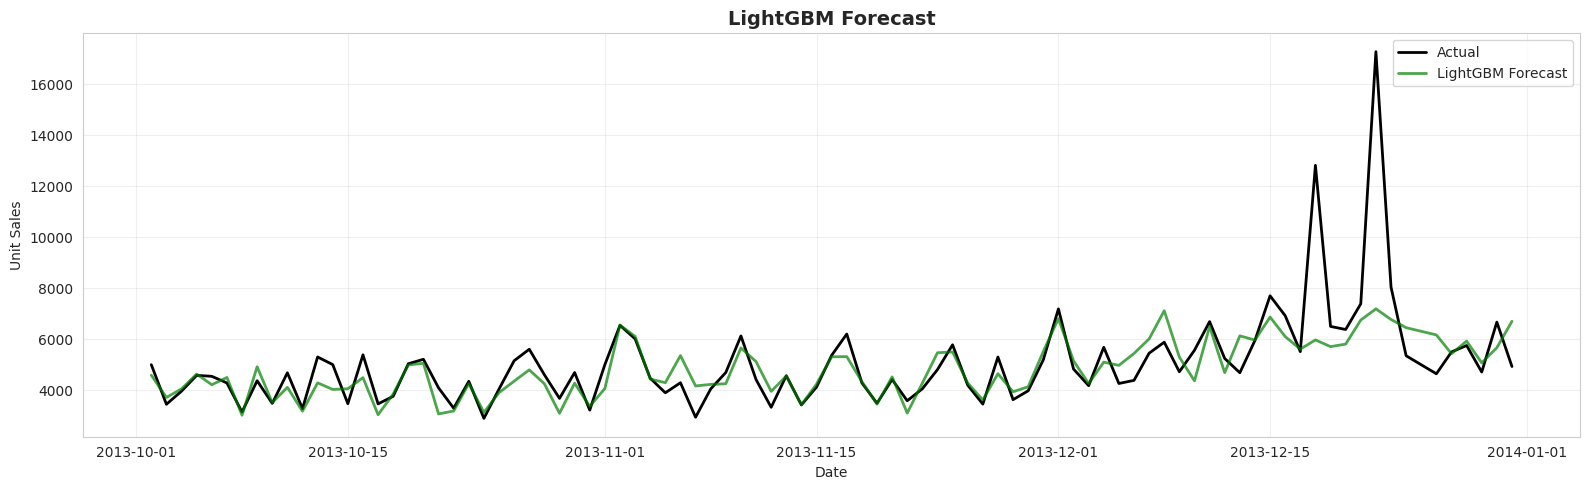

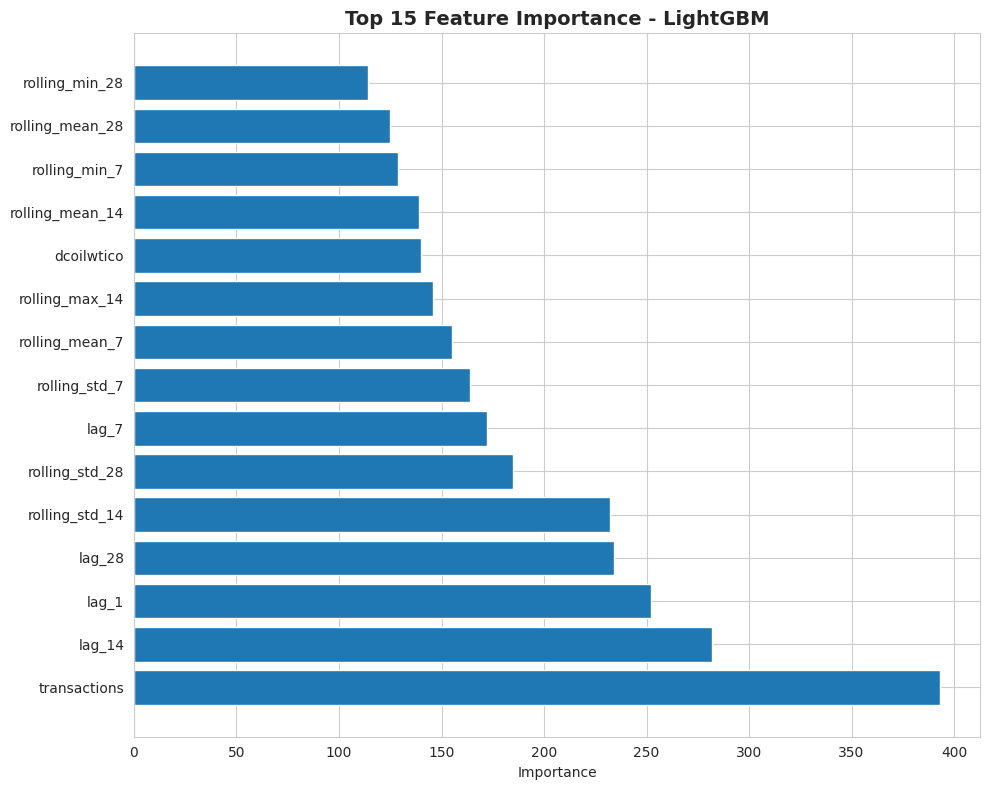


✅ LightGBM model complete!


In [15]:
# 15: Model 3 - LightGBM with Engineered Features
print("="*80)
print("MODEL 3: LIGHTGBM")
print("="*80)

print("\n Configuring LightGBM parameters...")
lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'n_estimators': 500
}

print("\n Training LightGBM model...")
lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[lgb.log_evaluation(period=100)]
)
print("✓ Model trained!")

# Make predictions
print("\n Generating predictions...")
lgb_pred = lgb_model.predict(X_val)
lgb_pred = np.clip(lgb_pred, 0, None)

# Evaluate
lgb_metrics = evaluate_forecast(y_val.values, lgb_pred, "LightGBM")
print_metrics(lgb_metrics)

# Feature importance
print("\n Feature Importance:")
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# Visualize predictions
plt.figure(figsize=(16, 5))
plt.plot(lgb_val['date'], y_val, label='Actual', linewidth=2, color='black')
plt.plot(lgb_val['date'], lgb_pred, label='LightGBM Forecast', linewidth=2, color='green', alpha=0.7)
plt.title('LightGBM Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance.head(15)['feature'], feature_importance.head(15)['importance'])
plt.title('Top 15 Feature Importance - LightGBM', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\n✅ LightGBM model complete!")

### 16. Model Comparison

MODEL COMPARISON

 Model Performance Comparison:

                  model         mae        rmse      mape     mase
Naive Seasonal Baseline  978.611111 1874.296256 16.414495 0.700292
                Prophet 4690.360611 5388.652300 99.078462 3.356411
               LightGBM  658.615440 1428.784016 10.976233 0.471304

 BEST MODEL: LightGBM
   MAE: 658.62
   RMSE: 1,428.78
   MAPE: 10.98%

✓ Comparison saved to: /content/drive/MyDrive/ts_project/model_comparison.csv


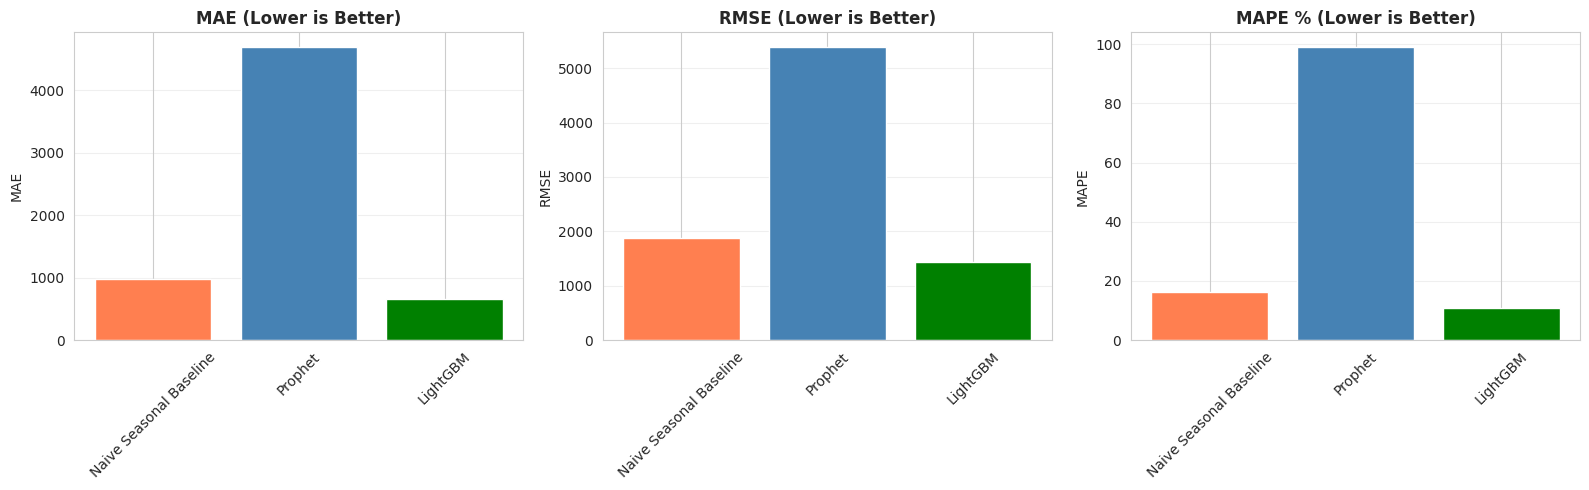


✅ Model comparison complete!


In [16]:
# 16: Compare All Models
print("="*80)
print("MODEL COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame([
    baseline_metrics,
    prophet_metrics,
    lgb_metrics
])

print("\n Model Performance Comparison:\n")
print(comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['mae'].idxmin()
best_model = comparison_df.iloc[best_model_idx]['model']

print(f"\n BEST MODEL: {best_model}")
print(f"   MAE: {comparison_df.iloc[best_model_idx]['mae']:,.2f}")
print(f"   RMSE: {comparison_df.iloc[best_model_idx]['rmse']:,.2f}")
print(f"   MAPE: {comparison_df.iloc[best_model_idx]['mape']:.2f}%")

# Save comparison
comparison_path = os.path.join(drive_folder, 'model_comparison.csv')
comparison_df.to_csv(comparison_path, index=False)
print(f"\n✓ Comparison saved to: {comparison_path}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics_to_plot = ['mae', 'rmse', 'mape']
titles = ['MAE (Lower is Better)', 'RMSE (Lower is Better)', 'MAPE % (Lower is Better)']
colors = ['coral', 'steelblue', 'green']

for i, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    axes[i].bar(comparison_df['model'], comparison_df[metric], color=colors)
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].set_ylabel(metric.upper())
    axes[i].grid(True, alpha=0.3, axis='y')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(drive_folder, 'model_comparison.png'), dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Model comparison complete!")

### 17. Generate Final Forecasts (Jan-Mar 2014)

In [17]:
# 17: Generate Final Forecasts for Jan-Mar 2014
print("="*80)
print("GENERATING FINAL FORECASTS (JAN-MAR 2014)")
print("="*80)

forecast_start = pd.to_datetime('2014-01-01')
forecast_end = pd.to_datetime('2014-03-31')
forecast_dates = pd.date_range(start=forecast_start, end=forecast_end, freq='D')

print(f"\n Forecast period: {forecast_start.date()} to {forecast_end.date()}")
print(f"   Total days: {len(forecast_dates)}")

# Retrain LightGBM on full data
print("\n Retraining LightGBM on full dataset...")
X_full = lgb_data[feature_cols]
y_full = lgb_data['unit_sales']

lgb_final_model = lgb.LGBMRegressor(**lgb_params)
lgb_final_model.fit(X_full, y_full, callbacks=[lgb.log_evaluation(period=-1)])
print("✓ Final model trained!")

# Generate forecasts iteratively
print("\n Generating forecasts (iterative approach)...")
print("   This may take a few minutes...\n")

history = combo_data.copy()
forecast_results = []

for i, forecast_date in enumerate(forecast_dates):
    # Create features for this date
    row = {'date': forecast_date}

    # Time features
    row['day_of_week'] = forecast_date.dayofweek
    row['month'] = forecast_date.month
    row['year'] = forecast_date.year
    row['quarter'] = forecast_date.quarter

    # External features
    holiday_info = holiday_events[holiday_events['date'] == forecast_date]
    if len(holiday_info) > 0:
        row['is_holiday'] = int(holiday_info.iloc[0]['is_holiday'])
        row['is_national_holiday'] = int(holiday_info.iloc[0]['is_national_holiday'])
    else:
        row['is_holiday'] = 0
        row['is_national_holiday'] = 0

    # Payday
    day = forecast_date.day
    days_in_month = pd.Timestamp(forecast_date.year, forecast_date.month, 1).days_in_month
    row['is_payday'] = int((day == 15) or (day == days_in_month))

    # Weekend
    row['is_weekend'] = int(forecast_date.dayofweek >= 5)

    # Oil price
    oil_price = oil[oil['date'] <= forecast_date].tail(1)
    if len(oil_price) > 0:
        row['dcoilwtico'] = oil_price.iloc[0]['dcoilwtico']
    else:
        row['dcoilwtico'] = history['dcoilwtico'].iloc[-1]

    # Promotion and transactions (use recent average)
    row['onpromotion'] = history['onpromotion'].tail(30).mean()
    row['transactions'] = history['transactions'].tail(30).mean()

    # Lag features
    row['lag_1'] = history['unit_sales'].iloc[-1]
    row['lag_7'] = history['unit_sales'].iloc[-7]
    row['lag_14'] = history['unit_sales'].iloc[-14]
    row['lag_28'] = history['unit_sales'].iloc[-28]

    # Rolling features
    recent_sales = history['unit_sales'].tail(28)
    row['rolling_mean_7'] = recent_sales.tail(7).mean()
    row['rolling_std_7'] = recent_sales.tail(7).std()
    row['rolling_min_7'] = recent_sales.tail(7).min()
    row['rolling_max_7'] = recent_sales.tail(7).max()

    row['rolling_mean_14'] = recent_sales.tail(14).mean()
    row['rolling_std_14'] = recent_sales.tail(14).std()
    row['rolling_min_14'] = recent_sales.tail(14).min()
    row['rolling_max_14'] = recent_sales.tail(14).max()

    row['rolling_mean_28'] = recent_sales.mean()
    row['rolling_std_28'] = recent_sales.std()
    row['rolling_min_28'] = recent_sales.min()
    row['rolling_max_28'] = recent_sales.max()

    # Predict
    X_forecast = pd.DataFrame([row])[feature_cols]
    prediction = lgb_final_model.predict(X_forecast)[0]
    prediction = max(0, prediction)

    row['unit_sales'] = prediction
    row['store_nbr'] = example_store
    row['family'] = example_family
    forecast_results.append(row)

    # Update history
    history = pd.concat([history, pd.DataFrame([row])], ignore_index=True)

    # Progress
    if (i + 1) % 15 == 0:
        print(f"   Generated {i+1}/{len(forecast_dates)} forecasts...")

forecast_final = pd.DataFrame(forecast_results)

print(f"\n✓ Forecasts generated for {len(forecast_final)} days")

# Summary
print("\n Forecast Summary:")
print(forecast_final[['date', 'unit_sales']].head(10))
print("...")
print(forecast_final[['date', 'unit_sales']].tail(10))

print(f"\n Forecast Statistics:")
print(f"   Mean: {forecast_final['unit_sales'].mean():,.2f}")
print(f"   Median: {forecast_final['unit_sales'].median():,.2f}")
print(f"   Min: {forecast_final['unit_sales'].min():,.2f}")
print(f"   Max: {forecast_final['unit_sales'].max():,.2f}")
print(f"   Total: {forecast_final['unit_sales'].sum():,.2f}")

print("\n✅ Final forecasts generated!")

GENERATING FINAL FORECASTS (JAN-MAR 2014)

 Forecast period: 2014-01-01 to 2014-03-31
   Total days: 90

 Retraining LightGBM on full dataset...
✓ Final model trained!

 Generating forecasts (iterative approach)...
   This may take a few minutes...

   Generated 15/90 forecasts...
   Generated 30/90 forecasts...
   Generated 45/90 forecasts...
   Generated 60/90 forecasts...
   Generated 75/90 forecasts...
   Generated 90/90 forecasts...

✓ Forecasts generated for 90 days

 Forecast Summary:
        date   unit_sales
0 2014-01-01  6238.654958
1 2014-01-02  5432.285458
2 2014-01-03  5207.576272
3 2014-01-04  5143.497726
4 2014-01-05  5876.477427
5 2014-01-06  7120.423436
6 2014-01-07  6524.855115
7 2014-01-08  6892.159044
8 2014-01-09  6327.758663
9 2014-01-10  6280.649066
...
         date    unit_sales
80 2014-03-22   9568.256271
81 2014-03-23  10410.459659
82 2014-03-24   9696.430510
83 2014-03-25   9696.430510
84 2014-03-26   9696.430510
85 2014-03-27   9568.256271
86 2014-03-28   9

### 18. Visualize Final Forecasts

VISUALIZING FINAL FORECASTS


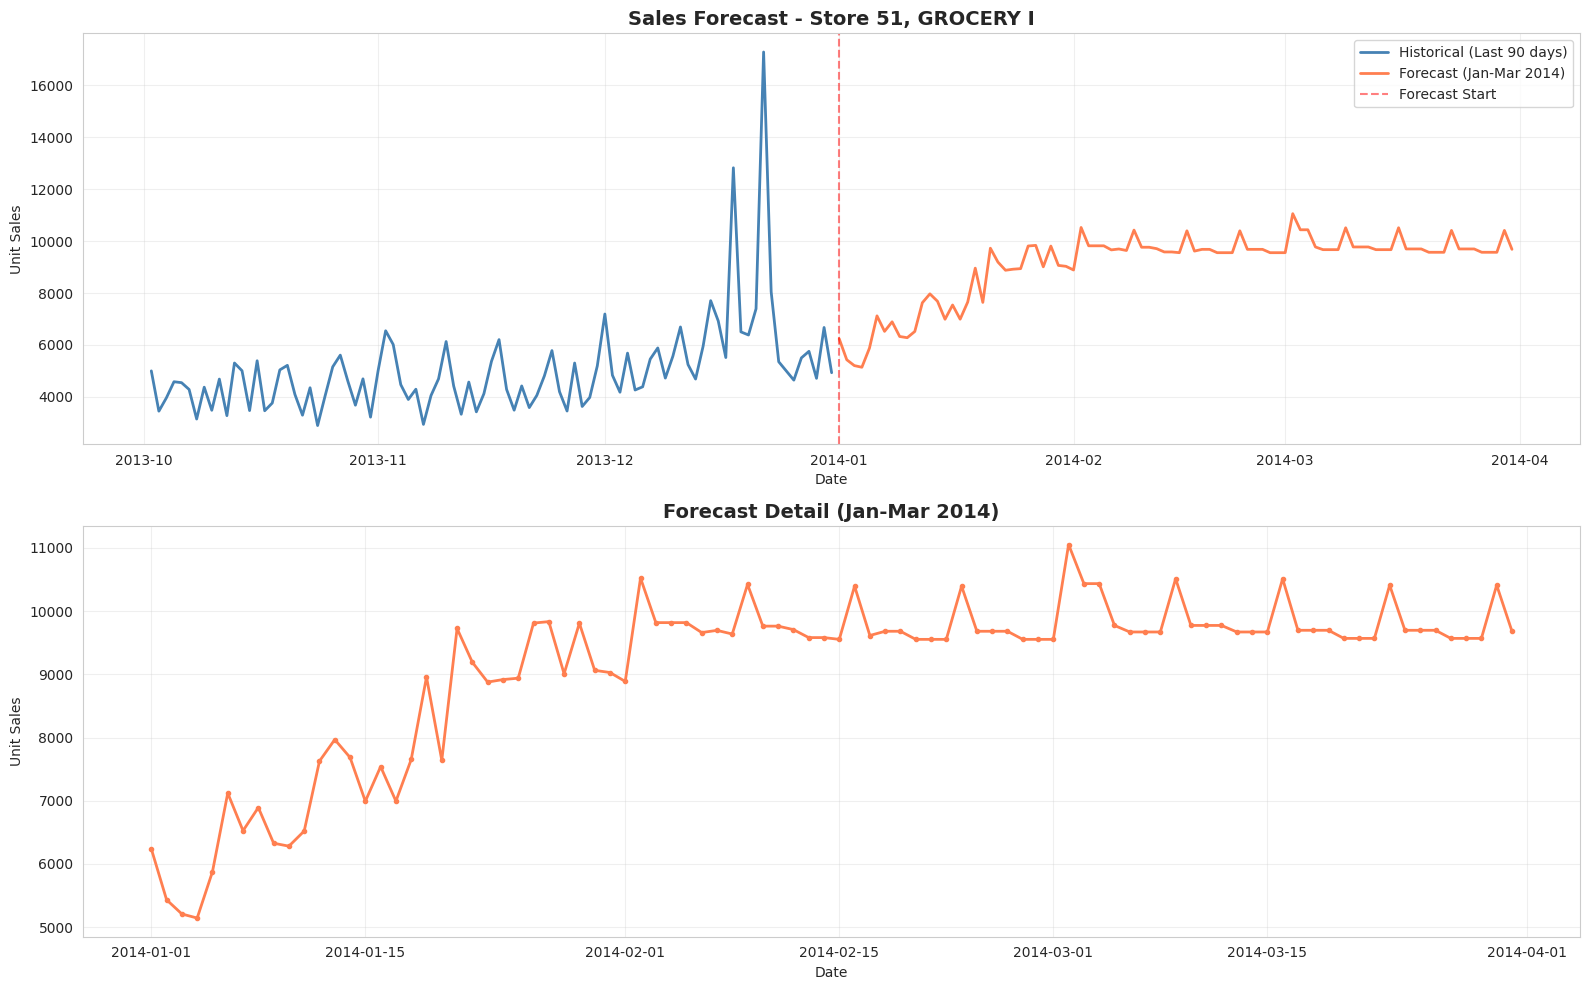

✓ Forecast visualization saved!


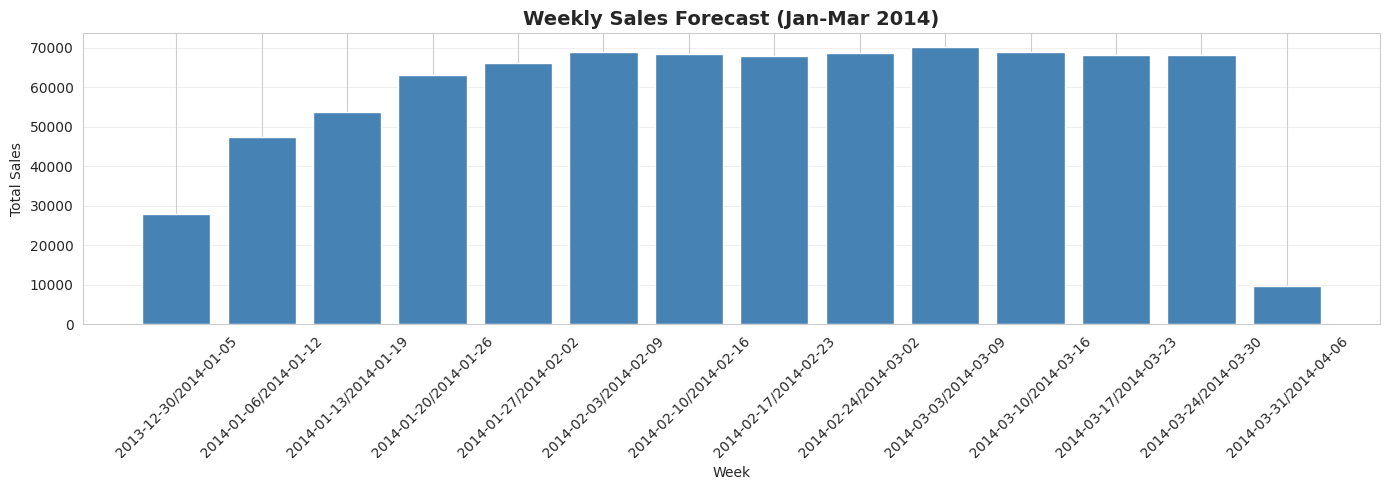


✅ Visualizations complete!


In [18]:
# 18: Visualize Final Forecasts
print("="*80)
print("VISUALIZING FINAL FORECASTS")
print("="*80)

# Plot historical + forecast
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Full view
last_90_days = combo_data.tail(90)
axes[0].plot(last_90_days['date'], last_90_days['unit_sales'],
             label='Historical (Last 90 days)', linewidth=2, color='steelblue')
axes[0].plot(forecast_final['date'], forecast_final['unit_sales'],
             label='Forecast (Jan-Mar 2014)', linewidth=2, color='coral')
axes[0].axvline(x=forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
axes[0].set_title(f'Sales Forecast - Store {example_store}, {example_family}',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Unit Sales')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Forecast only (detailed view)
axes[1].plot(forecast_final['date'], forecast_final['unit_sales'],
             linewidth=2, color='coral', marker='o', markersize=3)
axes[1].set_title('Forecast Detail (Jan-Mar 2014)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Unit Sales')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(drive_folder, f'forecast_store{example_store}_{example_family}.png'),
            dpi=150, bbox_inches='tight')
plt.show()

print("✓ Forecast visualization saved!")

# Weekly aggregation
forecast_weekly = forecast_final.copy()
forecast_weekly['week'] = forecast_weekly['date'].dt.to_period('W')
weekly_agg = forecast_weekly.groupby('week')['unit_sales'].sum().reset_index()
weekly_agg['week'] = weekly_agg['week'].astype(str)

plt.figure(figsize=(14, 5))
plt.bar(weekly_agg['week'], weekly_agg['unit_sales'], color='steelblue')
plt.title('Weekly Sales Forecast (Jan-Mar 2014)', fontsize=14, fontweight='bold')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n✅ Visualizations complete!")

### 19. Save Models and Forecasts

In [19]:
# 19: Save Final Models and Forecasts
print("="*80)
print("SAVING MODELS AND FORECASTS")
print("="*80)

import pickle

# Create directories
models_dir = os.path.join(drive_folder, 'models')
forecasts_dir = os.path.join(drive_folder, 'forecasts')

os.makedirs(models_dir, exist_ok=True)
os.makedirs(forecasts_dir, exist_ok=True)

print("\n Saving models...")

# Save LightGBM model
model_filename = f'lgb_store{example_store}_{example_family}.pkl'
model_path = os.path.join(models_dir, model_filename)
with open(model_path, 'wb') as f:
    pickle.dump(lgb_final_model, f)
print(f"✓ LightGBM model saved: {model_filename}")

# Save Prophet model
prophet_filename = f'prophet_store{example_store}_{example_family}.pkl'
prophet_path = os.path.join(models_dir, prophet_filename)
with open(prophet_path, 'wb') as f:
    pickle.dump(prophet_model, f)
print(f"✓ Prophet model saved: {prophet_filename}")

# Save model configuration
model_config = {
    'store_nbr': int(example_store),
    'family': example_family,
    'model_type': 'LightGBM',
    'feature_cols': feature_cols,
    'params': lgb_params,
    'best_model': best_model,
    'metrics': {
        'mae': float(lgb_metrics['mae']),
        'rmse': float(lgb_metrics['rmse']),
        'mape': float(lgb_metrics['mape'])
    }
}

config_path = os.path.join(models_dir, f'config_store{example_store}_{example_family}.json')
with open(config_path, 'w') as f:
    json.dump(model_config, f, indent=2)
print(f"✓ Model config saved")

print("\n Saving forecasts...")

# Save forecast
forecast_filename = f'forecast_store{example_store}_{example_family}.csv'
forecast_path = os.path.join(forecasts_dir, forecast_filename)
forecast_final.to_csv(forecast_path, index=False)
print(f"✓ Forecast saved: {forecast_filename}")

print("\n✅ All models and forecasts saved!")


SAVING MODELS AND FORECASTS

 Saving models...
✓ LightGBM model saved: lgb_store51_GROCERY I.pkl
✓ Prophet model saved: prophet_store51_GROCERY I.pkl
✓ Model config saved

 Saving forecasts...
✓ Forecast saved: forecast_store51_GROCERY I.csv

✅ All models and forecasts saved!


### 20. Train Models for All Top Combinations

In [20]:
# 20: Train Models for All Top Combinations
print("="*80)
print("TRAINING MODELS FOR ALL TOP COMBINATIONS")
print("="*80)

all_forecasts = {}
all_models = {}
all_configs = {}

for idx, combo in enumerate(top_combinations.itertuples(), 1):
    store_nbr = int(combo.store_nbr)
    family = combo.family

    print(f"\n{'='*80}")
    print(f"[{idx}/{len(top_combinations)}] Store {store_nbr} - {family}")
    print(f"{'='*80}")

    # Filter data
    combo_data_temp = agg_data[
        (agg_data['store_nbr'] == store_nbr) &
        (agg_data['family'] == family)
    ].copy()
    combo_data_temp = combo_data_temp.sort_values('date').reset_index(drop=True)

    print(f"   Data points: {len(combo_data_temp)}")

    # Create features
    lgb_data_temp = combo_data_temp.copy()
    lgb_data_temp = create_lag_features(lgb_data_temp, lags=[1, 7, 14, 28])
    lgb_data_temp = create_rolling_features(lgb_data_temp, windows=[7, 14, 28])
    lgb_data_temp = lgb_data_temp.dropna()

    # Train model
    X_full_temp = lgb_data_temp[feature_cols]
    y_full_temp = lgb_data_temp['unit_sales']

    print(f"   Training LightGBM...")
    lgb_model_temp = lgb.LGBMRegressor(**lgb_params)
    lgb_model_temp.fit(X_full_temp, y_full_temp, callbacks=[lgb.log_evaluation(period=-1)])
    print(f"   ✓ Model trained")

    # Generate forecast
    print(f"   Generating forecast...")
    history_temp = combo_data_temp.copy()
    forecast_results_temp = []

    for forecast_date in forecast_dates:
        row = {'date': forecast_date}

        # Time features
        row['day_of_week'] = forecast_date.dayofweek
        row['month'] = forecast_date.month
        row['year'] = forecast_date.year
        row['quarter'] = forecast_date.quarter

        # External features
        holiday_info = holiday_events[holiday_events['date'] == forecast_date]
        if len(holiday_info) > 0:
            row['is_holiday'] = int(holiday_info.iloc[0]['is_holiday'])
            row['is_national_holiday'] = int(holiday_info.iloc[0]['is_national_holiday'])
        else:
            row['is_holiday'] = 0
            row['is_national_holiday'] = 0

        day = forecast_date.day
        days_in_month = pd.Timestamp(forecast_date.year, forecast_date.month, 1).days_in_month
        row['is_payday'] = int((day == 15) or (day == days_in_month))
        row['is_weekend'] = int(forecast_date.dayofweek >= 5)

        oil_price = oil[oil['date'] <= forecast_date].tail(1)
        if len(oil_price) > 0:
            row['dcoilwtico'] = oil_price.iloc[0]['dcoilwtico']
        else:
            row['dcoilwtico'] = history_temp['dcoilwtico'].iloc[-1]

        row['onpromotion'] = history_temp['onpromotion'].tail(30).mean()
        row['transactions'] = history_temp['transactions'].tail(30).mean()

        # Lag features
        row['lag_1'] = history_temp['unit_sales'].iloc[-1]
        row['lag_7'] = history_temp['unit_sales'].iloc[-7]
        row['lag_14'] = history_temp['unit_sales'].iloc[-14]
        row['lag_28'] = history_temp['unit_sales'].iloc[-28]

        # Rolling features
        recent_sales = history_temp['unit_sales'].tail(28)
        row['rolling_mean_7'] = recent_sales.tail(7).mean()
        row['rolling_std_7'] = recent_sales.tail(7).std()
        row['rolling_min_7'] = recent_sales.tail(7).min()
        row['rolling_max_7'] = recent_sales.tail(7).max()

        row['rolling_mean_14'] = recent_sales.tail(14).mean()
        row['rolling_std_14'] = recent_sales.tail(14).std()
        row['rolling_min_14'] = recent_sales.tail(14).min()
        row['rolling_max_14'] = recent_sales.tail(14).max()

        row['rolling_mean_28'] = recent_sales.mean()
        row['rolling_std_28'] = recent_sales.std()
        row['rolling_min_28'] = recent_sales.min()
        row['rolling_max_28'] = recent_sales.max()

        # Predict
        X_forecast_temp = pd.DataFrame([row])[feature_cols]
        prediction = lgb_model_temp.predict(X_forecast_temp)[0]
        prediction = max(0, prediction)

        row['unit_sales'] = prediction
        row['store_nbr'] = store_nbr
        row['family'] = family
        forecast_results_temp.append(row)

        # Update history
        history_temp = pd.concat([history_temp, pd.DataFrame([row])], ignore_index=True)

    forecast_df_temp = pd.DataFrame(forecast_results_temp)

    # Store results
    model_key = f"{store_nbr}_{family}"
    all_models[model_key] = lgb_model_temp
    all_forecasts[model_key] = forecast_df_temp

    # Save to disk
    model_file = f'lgb_store{store_nbr}_{family}.pkl'
    with open(os.path.join(models_dir, model_file), 'wb') as f:
        pickle.dump(lgb_model_temp, f)

    forecast_file = f'forecast_store{store_nbr}_{family}.csv'
    forecast_df_temp.to_csv(os.path.join(forecasts_dir, forecast_file), index=False)

    config = {
        'store_nbr': int(store_nbr),
        'family': family,
        'model_type': 'LightGBM',
        'feature_cols': feature_cols,
        'mean_forecast': float(forecast_df_temp['unit_sales'].mean()),
        'total_forecast': float(forecast_df_temp['unit_sales'].sum())
    }
    all_configs[model_key] = config

    config_file = f'config_store{store_nbr}_{family}.json'
    with open(os.path.join(models_dir, config_file), 'w') as f:
        json.dump(config, f, indent=2)

    print(f"   ✓ Model saved: {model_file}")
    print(f"   ✓ Forecast saved: {forecast_file}")
    print(f"   ✓ Mean forecast: {config['mean_forecast']:.2f}")

print("\n" + "="*80)
print("ALL MODELS TRAINED AND SAVED")
print("="*80)
print(f"   Total models: {len(all_models)}")
print(f"   Total forecasts: {len(all_forecasts)}")

TRAINING MODELS FOR ALL TOP COMBINATIONS

[1/3] Store 51 - GROCERY I
   Data points: 363
   Training LightGBM...
   ✓ Model trained
   Generating forecast...
   ✓ Model saved: lgb_store51_GROCERY I.pkl
   ✓ Forecast saved: forecast_store51_GROCERY I.csv
   ✓ Mean forecast: 9081.23

[2/3] Store 24 - GROCERY I
   Data points: 363
   Training LightGBM...
   ✓ Model trained
   Generating forecast...
   ✓ Model saved: lgb_store24_GROCERY I.pkl
   ✓ Forecast saved: forecast_store24_GROCERY I.csv
   ✓ Mean forecast: 5592.12

[3/3] Store 34 - GROCERY I
   Data points: 363
   Training LightGBM...
   ✓ Model trained
   Generating forecast...
   ✓ Model saved: lgb_store34_GROCERY I.pkl
   ✓ Forecast saved: forecast_store34_GROCERY I.csv
   ✓ Mean forecast: 6295.76

ALL MODELS TRAINED AND SAVED
   Total models: 3
   Total forecasts: 3


### 21. Create Model Registry

In [21]:
# 21: Create Model Registry
print("="*80)
print("CREATING MODEL REGISTRY")
print("="*80)

model_registry = []

for model_key, config in all_configs.items():
    registry_entry = {
        'store_nbr': config['store_nbr'],
        'family': config['family'],
        'model_path': f"models/lgb_store{config['store_nbr']}_{config['family']}.pkl",
        'config_path': f"models/config_store{config['store_nbr']}_{config['family']}.json",
        'forecast_path': f"forecasts/forecast_store{config['store_nbr']}_{config['family']}.csv",
        'mean_forecast': config['mean_forecast'],
        'total_forecast': config['total_forecast']
    }
    model_registry.append(registry_entry)

model_registry_df = pd.DataFrame(model_registry)

# Save as CSV
registry_csv_path = os.path.join(drive_folder, 'model_registry.csv')
model_registry_df.to_csv(registry_csv_path, index=False)

# Save as JSON
registry_json_path = os.path.join(drive_folder, 'model_registry.json')
with open(registry_json_path, 'w') as f:
    json.dump(model_registry, f, indent=2)

print("✓ Model registry created")
print("\nModel Registry:")
print(model_registry_df)



print("\n✅ Model registry complete!")

CREATING MODEL REGISTRY
✓ Model registry created

Model Registry:
   store_nbr     family                        model_path  \
0         51  GROCERY I  models/lgb_store51_GROCERY I.pkl   
1         24  GROCERY I  models/lgb_store24_GROCERY I.pkl   
2         34  GROCERY I  models/lgb_store34_GROCERY I.pkl   

                            config_path  \
0  models/config_store51_GROCERY I.json   
1  models/config_store24_GROCERY I.json   
2  models/config_store34_GROCERY I.json   

                              forecast_path  mean_forecast  total_forecast  
0  forecasts/forecast_store51_GROCERY I.csv    9081.230793   817310.771337  
1  forecasts/forecast_store24_GROCERY I.csv    5592.116202   503290.458167  
2  forecasts/forecast_store34_GROCERY I.csv    6295.761733   566618.555985  

✅ Model registry complete!


### 22. Final Summary and Next Steps

In [22]:
# 22: Final Summary
print("="*80)
print("PROJECT COMPLETE - SUMMARY")
print("="*80)

print("\n ACCOMPLISHMENTS:")
print("\n1. Data Processing:")
print(f"   ✓ Loaded {len(train_guayaquil):,} rows of Guayaquil sales data")
print(f"   ✓ Created {len(train_guayaquil.columns)} features")
print(f"   ✓ Processed {len(guayaquil_store_nbrs)} stores")
print(f"   ✓ Covered {items['family'].nunique()} product families")

print("\n2. Exploratory Data Analysis:")
print("   ✓ Analyzed sales trends and seasonality")
print("   ✓ Identified promotion impact")
print("   ✓ Analyzed holiday and payday effects")
print("   ✓ Examined store and family performance")

print("\n3. Models Developed:")
print("   ✓ Naive Seasonal Baseline")
print("   ✓ Prophet (Facebook)")
print("   ✓ LightGBM with engineered features")
print(f"\n    Best Model: {best_model}")
print(f"      MAE: {comparison_df[comparison_df['model'] == best_model]['mae'].values[0]:,.2f}")

print(f"\n4. Forecasts Generated:")
print(f"   ✓ Forecast period: Jan 1 - Mar 31, 2014 ({len(forecast_dates)} days)")
print(f"   ✓ Models trained: {len(all_models)}")
print(f"   ✓ Store-Family combinations: {len(model_registry)}")


print("\n" + "="*80)
print(" MODEL PERFORMANCE SUMMARY")
print("="*80)
print("\nTop Store-Family Combinations:")
for entry in model_registry:
    print(f"\n   Store {entry['store_nbr']} - {entry['family']}")
    print(f"      Mean daily forecast: {entry['mean_forecast']:,.2f} units")
    print(f"      Total Q1 2014: {entry['total_forecast']:,.2f} units")

print("\n" + "="*80)
print(" NEXT STEPS")
print("="*80)


print("\n Deploy to Streamlit Cloud")



print("\n" + "="*80)
print(" ✅ PROJECT SUCCESSFULLY COMPLETED! ")
print("="*80)


print("\n Ready for deployment and business use!")

PROJECT COMPLETE - SUMMARY

 ACCOMPLISHMENTS:

1. Data Processing:
   ✓ Loaded 17,039,400 rows of Guayaquil sales data
   ✓ Created 29 features
   ✓ Processed 8 stores
   ✓ Covered 33 product families

2. Exploratory Data Analysis:
   ✓ Analyzed sales trends and seasonality
   ✓ Identified promotion impact
   ✓ Analyzed holiday and payday effects
   ✓ Examined store and family performance

3. Models Developed:
   ✓ Naive Seasonal Baseline
   ✓ Prophet (Facebook)
   ✓ LightGBM with engineered features

    Best Model: LightGBM
      MAE: 658.62

4. Forecasts Generated:
   ✓ Forecast period: Jan 1 - Mar 31, 2014 (90 days)
   ✓ Models trained: 3
   ✓ Store-Family combinations: 3

 MODEL PERFORMANCE SUMMARY

Top Store-Family Combinations:

   Store 51 - GROCERY I
      Mean daily forecast: 9,081.23 units
      Total Q1 2014: 817,310.77 units

   Store 24 - GROCERY I
      Mean daily forecast: 5,592.12 units
      Total Q1 2014: 503,290.46 units

   Store 34 - GROCERY I
      Mean daily for

### 23. Create Interactive Forecast Viewer (Colab Widget)

In [23]:
# 23: Interactive Forecast Viewer in Colab
print("="*80)
print("INTERACTIVE FORECAST VIEWER")
print("="*80)

import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go

# Create dropdown widgets
store_options = [(f"Store {s}", s) for s in sorted(model_registry_df['store_nbr'].unique())]
store_dropdown = widgets.Dropdown(
    options=store_options,
    description='Store:',
    style={'description_width': 'initial'}
)

def update_family_dropdown(change):
    selected_store = change.new
    families = model_registry_df[model_registry_df['store_nbr'] == selected_store]['family'].tolist()
    family_dropdown.options = families
    if families:
        family_dropdown.value = families[0]

family_options = model_registry_df[model_registry_df['store_nbr'] == store_dropdown.value]['family'].tolist()
family_dropdown = widgets.Dropdown(
    options=family_options,
    description='Family:',
    style={'description_width': 'initial'}
)

store_dropdown.observe(update_family_dropdown, names='value')

days_slider = widgets.IntSlider(
    value=90,
    min=7,
    max=90,
    step=7,
    description='Forecast Days:',
    style={'description_width': 'initial'}
)

view_button = widgets.Button(
    description='View Forecast',
    button_style='success',
    icon='chart-line'
)

output = widgets.Output()

def view_forecast(b):
    with output:
        clear_output(wait=True)

        selected_store = store_dropdown.value
        selected_family = family_dropdown.value
        selected_days = days_slider.value

        print(f"Loading forecast for Store {selected_store} - {selected_family}...")

        # Load forecast
        forecast_file = f'forecast_store{selected_store}_{selected_family}.csv'
        forecast_path = os.path.join(forecasts_dir, forecast_file)

        if os.path.exists(forecast_path):
            forecast_df = pd.read_csv(forecast_path, parse_dates=['date'])
            forecast_df = forecast_df.head(selected_days)

            # Load historical data
            hist_data = agg_data[
                (agg_data['store_nbr'] == selected_store) &
                (agg_data['family'] == selected_family)
            ].tail(90)

            # Create interactive plot
            fig = go.Figure()

            # Historical
            fig.add_trace(go.Scatter(
                x=hist_data['date'],
                y=hist_data['unit_sales'],
                mode='lines',
                name='Historical',
                line=dict(color='steelblue', width=2)
            ))

            # Forecast
            fig.add_trace(go.Scatter(
                x=forecast_df['date'],
                y=forecast_df['unit_sales'],
                mode='lines+markers',
                name='Forecast',
                line=dict(color='coral', width=2),
                marker=dict(size=4)
            ))

            fig.update_layout(
                title=f'Sales Forecast - Store {selected_store}, {selected_family}',
                xaxis_title='Date',
                yaxis_title='Unit Sales',
                hovermode='x unified',
                height=500,
                showlegend=True
            )

            fig.show()

            # Statistics
            print(f"\n Forecast Statistics:")
            print(f"   Mean daily sales: {forecast_df['unit_sales'].mean():,.2f}")
            print(f"   Median daily sales: {forecast_df['unit_sales'].median():,.2f}")
            print(f"   Total forecast: {forecast_df['unit_sales'].sum():,.2f}")
            print(f"   Min: {forecast_df['unit_sales'].min():,.2f}")
            print(f"   Max: {forecast_df['unit_sales'].max():,.2f}")

        else:
            print(f" Forecast file not found: {forecast_file}")

view_button.on_click(view_forecast)

# Display widgets
print("✅ Interactive viewer ready!")
print("\nSelect store, family, and forecast days, then click 'View Forecast':\n")

display(widgets.VBox([
    store_dropdown,
    family_dropdown,
    days_slider,
    view_button,
    output
]))

INTERACTIVE FORECAST VIEWER
✅ Interactive viewer ready!

Select store, family, and forecast days, then click 'View Forecast':



### 24. Download All Results as ZIP

In [24]:
# 24: Create Downloadable ZIP Package
print("="*80)
print("CREATING DOWNLOADABLE PACKAGE")
print("="*80)

import zipfile
import shutil

# Create zip file
zip_filename = 'grocery_forecasting_results.zip'
zip_path = os.path.join(drive_folder, zip_filename)

print(f"\n Creating ZIP package: {zip_filename}")

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add CSV files
    csv_files = [
        'train_guayaquil_processed.csv',
        'model_comparison.csv',
        'model_registry.csv'
    ]

    for csv_file in csv_files:
        file_path = os.path.join(drive_folder, csv_file)
        if os.path.exists(file_path):
            zipf.write(file_path, csv_file)
            print(f"   ✓ Added {csv_file}")

    # Add JSON files
    json_files = [
        'forecast_metadata.json',
        'model_registry.json',
        'selected_combinations.json'
    ]

    for json_file in json_files:
        file_path = os.path.join(drive_folder, json_file)
        if os.path.exists(file_path):
            zipf.write(file_path, json_file)
            print(f"   ✓ Added {json_file}")

    # Add model files
    print(f"\n   Adding models...")
    for file in os.listdir(models_dir):
        if file.endswith(('.pkl', '.json')):
            file_path = os.path.join(models_dir, file)
            zipf.write(file_path, f'models/{file}')
    print(f"   ✓ Added {len([f for f in os.listdir(models_dir)])} model files")

    # Add forecast files
    print(f"\n   Adding forecasts...")
    for file in os.listdir(forecasts_dir):
        if file.endswith('.csv'):
            file_path = os.path.join(forecasts_dir, file)
            zipf.write(file_path, f'forecasts/{file}')
    print(f"   ✓ Added {len([f for f in os.listdir(forecasts_dir)])} forecast files")

    # Add visualizations
    for file in os.listdir(drive_folder):
        if file.endswith('.png'):
            file_path = os.path.join(drive_folder, file)
            zipf.write(file_path, file)
            print(f"   ✓ Added {file}")

zip_size_mb = os.path.getsize(zip_path) / (1024**2)
print(f"\n✅ ZIP package created!")
print(f"   Size: {zip_size_mb:.2f} MB")


from google.colab import files
#print("\n Or download directly from Colab:")
#print("   Run the next cell to trigger download")

CREATING DOWNLOADABLE PACKAGE

 Creating ZIP package: grocery_forecasting_results.zip
   ✓ Added train_guayaquil_processed.csv
   ✓ Added model_comparison.csv
   ✓ Added model_registry.csv
   ✓ Added forecast_metadata.json
   ✓ Added model_registry.json
   ✓ Added selected_combinations.json

   Adding models...
   ✓ Added 7 model files

   Adding forecasts...
   ✓ Added 3 forecast files
   ✓ Added model_comparison.png
   ✓ Added forecast_store51_GROCERY I.png

✅ ZIP package created!
   Size: 171.31 MB


### 25. Project Summary Report

In [25]:
# 25: Generate Project Summary Report
print("="*80)
print("PROJECT SUMMARY REPORT")
print("="*80)

report = f"""
{'='*80}
GROCERY SALES FORECASTING PROJECT - FINAL REPORT
Corporación Favorita - Guayaquil Stores
{'='*80}

PROJECT OVERVIEW
{'='*80}
Objective: Forecast daily sales for Q1 2014 (Jan-Mar) for Guayaquil stores
Location: Guayaquil, Guayas Province, Ecuador
Forecast Horizon: 90 days (January 1 - March 31, 2014)

DATA SUMMARY
{'='*80}
Total Records Processed: {len(train_guayaquil):,}
Date Range: {train_guayaquil['date'].min()} to {train_guayaquil['date'].max()}
Stores Analyzed: {len(guayaquil_store_nbrs)} ({guayaquil_store_nbrs})
Unique Items: {train_guayaquil['item_nbr'].nunique():,}
Product Families: {train_guayaquil['family'].nunique()}

FEATURES ENGINEERED
{'='*80}
Total Features: {len(train_guayaquil.columns)}
Key Feature Categories:
  - Time-based: day_of_week, month, year, quarter, week_of_year
  - Holiday indicators: is_holiday, is_national_holiday, is_regional_holiday
  - Payday effects: is_payday, days_to_payday, is_payday_week
  - External factors: oil prices (dcoilwtico), transactions
  - Promotions: onpromotion flag
  - Product info: family, class, perishable status
  - Store info: type, cluster

MODELS DEVELOPED
{'='*80}
1. Naive Seasonal Baseline
   - Simple 7-day lag forecast
   - MAE: {baseline_metrics['mae']:,.2f}
   - RMSE: {baseline_metrics['rmse']:,.2f}
   - MAPE: {baseline_metrics['mape']:.2f}%

2. Prophet (Facebook)
   - Automatic seasonality detection
   - Holiday effects included
   - MAE: {prophet_metrics['mae']:,.2f}
   - RMSE: {prophet_metrics['rmse']:,.2f}
   - MAPE: {prophet_metrics['mape']:.2f}%

3. LightGBM (BEST MODEL)
   - Gradient boosting with engineered features
   - MAE: {lgb_metrics['mae']:,.2f}
   - RMSE: {lgb_metrics['rmse']:,.2f}
   - MAPE: {lgb_metrics['mape']:.2f}%

FORECASTS GENERATED
{'='*80}
Store-Family Combinations: {len(model_registry)}
Forecast Period: Jan 1 - Mar 31, 2014
Total Days Forecasted: 90

Top Combinations:
"""

for entry in model_registry:
    report += f"""
  Store {entry['store_nbr']} - {entry['family']}
    - Mean daily forecast: {entry['mean_forecast']:,.2f} units
    - Total Q1 2014: {entry['total_forecast']:,.2f} units
"""

report += f"""
DELIVERABLES
{'='*80}
✓ Processed datasets
✓ Trained models ({len(all_models)} models)
✓ Forecasts for Q1 2014 ({len(all_forecasts)} forecast files)
✓ Model registry and configurations
✓ Visualizations and plots
✓ Model comparison analysis

FILES SAVED
{'='*80}


Key Files:
  - train_guayaquil_processed.csv ({os.path.getsize(os.path.join(drive_folder, 'train_guayaquil_processed.csv'))/(1024**2):.1f} MB)
  - model_registry.csv
  - model_comparison.csv
  - grocery_forecasting_results.zip (complete package)

Directories:
  - models/ ({len([f for f in os.listdir(models_dir)])} files)
  - forecasts/ ({len([f for f in os.listdir(forecasts_dir)])} files)

KEY INSIGHTS
{'='*80}
1. Promotion Impact: {(train_guayaquil[train_guayaquil['onpromotion']==1]['unit_sales'].mean() / train_guayaquil[train_guayaquil['onpromotion']==0]['unit_sales'].mean() - 1)*100:.1f}% increase in sales
2. Payday Effect: Sales spike on 15th and last day of month
3. Holiday Impact: National holidays show significant sales changes
4. Top Product Family: {family_sales.iloc[0]['family']} ({family_sales.iloc[0]['unit_sales']:,.0f} total units)
5. Best Model: LightGBM outperforms baseline by {((baseline_metrics['mae'] - lgb_metrics['mae'])/baseline_metrics['mae'])*100:.1f}%

RECOMMENDATIONS FOR DEPLOYMENT
{'='*80}
1. Use LightGBM models for production forecasting
2. Update models monthly with new data
3. Monitor forecast accuracy and retrain as needed
4. Consider expanding to more store-family combinations
5. Integrate with inventory management systems

NEXT STEPS
{'='*80}
☐ Deploy Streamlit app for interactive forecasts
☐ Set up automated retraining pipeline
☐ Expand to additional stores/families
☐ Add confidence intervals to forecasts
☐ Implement ensemble methods for improved accuracy
☐ Integrate external data sources (weather, events)

{'='*80}
PROJECT STATUS: ✅ COMPLETE

{'='*80}
"""

print(report)

# Save report
report_path = os.path.join(drive_folder, 'project_summary_report.txt')
with open(report_path, 'w') as f:
    f.write(report)

print(f"\n✅ Report saved")

PROJECT SUMMARY REPORT

GROCERY SALES FORECASTING PROJECT - FINAL REPORT
Corporación Favorita - Guayaquil Stores

PROJECT OVERVIEW
Objective: Forecast daily sales for Q1 2014 (Jan-Mar) for Guayaquil stores
Location: Guayaquil, Guayas Province, Ecuador
Forecast Horizon: 90 days (January 1 - March 31, 2014)

DATA SUMMARY
Total Records Processed: 17,039,400
Date Range: 2013-01-02 00:00:00 to 2017-08-15 00:00:00
Stores Analyzed: 8 ([24, 26, 28, 29, 30, 32, 34, 51])
Unique Items: 4,005
Product Families: 33

FEATURES ENGINEERED
Total Features: 29
Key Feature Categories:
  - Time-based: day_of_week, month, year, quarter, week_of_year
  - Holiday indicators: is_holiday, is_national_holiday, is_regional_holiday
  - Payday effects: is_payday, days_to_payday, is_payday_week
  - External factors: oil prices (dcoilwtico), transactions
  - Promotions: onpromotion flag
  - Product info: family, class, perishable status
  - Store info: type, cluster

MODELS DEVELOPED
1. Naive Seasonal Baseline
   - Si

### 26. Export for Streamlit App

In [26]:
# Cell 26: Prepare Files for Streamlit Deployment
print("="*80)
print("PREPARING FILES FOR STREAMLIT DEPLOYMENT")
print("="*80)

print("\n Creating Streamlit-ready package...")

# Create streamlit directory
streamlit_dir = os.path.join(drive_folder, 'streamlit_app')
os.makedirs(streamlit_dir, exist_ok=True)
os.makedirs(os.path.join(streamlit_dir, 'data'), exist_ok=True)
os.makedirs(os.path.join(streamlit_dir, 'models'), exist_ok=True)
os.makedirs(os.path.join(streamlit_dir, 'app'), exist_ok=True)

print("✓ Directories created")

# Copy essential data files
essential_files = [
    'model_registry.json',
    'forecast_metadata.json',
    'selected_combinations.json'
]

for file in essential_files:
    src = os.path.join(drive_folder, file)
    dst = os.path.join(streamlit_dir, 'data', file)
    if os.path.exists(src):
        shutil.copy(src, dst)
        print(f"✓ Copied {file}")

# Copy model files (top 3 only to reduce size)
print("\nCopying model files...")
for entry in model_registry[:3]:  # Top 3 only
    store = entry['store_nbr']
    family = entry['family']

    # Model file
    model_file = f'lgb_store{store}_{family}.pkl'
    src = os.path.join(models_dir, model_file)
    dst = os.path.join(streamlit_dir, 'models', model_file)
    if os.path.exists(src):
        shutil.copy(src, dst)

    # Config file
    config_file = f'config_store{store}_{family}.json'
    src = os.path.join(models_dir, config_file)
    dst = os.path.join(streamlit_dir, 'models', config_file)
    if os.path.exists(src):
        shutil.copy(src, dst)

    # Forecast file
    forecast_file = f'forecast_store{store}_{family}.csv'
    src = os.path.join(forecasts_dir, forecast_file)
    dst = os.path.join(streamlit_dir, 'data', forecast_file)
    if os.path.exists(src):
        shutil.copy(src, dst)

    print(f"✓ Copied files for Store {store} - {family}")

# Create requirements.txt
print("\nCreating requirements.txt...")
requirements = """streamlit==1.29.0
pandas==2.1.4
numpy==1.26.2
plotly==5.18.0
lightgbm==4.1.0
scikit-learn==1.3.2
"""

with open(os.path.join(streamlit_dir, 'requirements.txt'), 'w') as f:
    f.write(requirements)
print("✓ requirements.txt created")

# Create app.py (Streamlit main file)
print("\nCreating app.py...")
app_code = '''"""
Grocery Sales Forecasting App - Guayaquil Stores
"""
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
import json
import pickle
import os
from datetime import datetime

# Page config
st.set_page_config(
    page_title="Grocery Sales Forecasting",
    page_icon="🛒",
    layout="wide"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        font-weight: 700;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 0.5rem;
    }
    .sub-header {
        font-size: 1.2rem;
        color: #666;
        text-align: center;
        margin-bottom: 2rem;
    }
</style>
""", unsafe_allow_html=True)

# Header
st.markdown('<div class="main-header">🛒 Grocery Sales Forecasting</div>', unsafe_allow_html=True)
st.markdown('<div class="sub-header">Corporación Favorita - Guayaquil Stores | Q1 2014</div>', unsafe_allow_html=True)

# Load model registry
@st.cache_data
def load_registry():
    with open('data/model_registry.json', 'r') as f:
        return json.load(f)

registry = load_registry()

# Sidebar
st.sidebar.header("📊 Forecast Configuration")

# Store selection
stores = sorted(list(set([r['store_nbr'] for r in registry])))
selected_store = st.sidebar.selectbox(
    "Select Store",
    stores,
    format_func=lambda x: f"Store {x}"
)

# Family selection
families = [r['family'] for r in registry if r['store_nbr'] == selected_store]
selected_family = st.sidebar.selectbox(
    "Select Product Family",
    families
)

# Forecast horizon
forecast_days = st.sidebar.slider(
    "Forecast Days",
    min_value=7,
    max_value=90,
    value=90,
    step=7
)

# Load forecast
@st.cache_data
def load_forecast(store, family):
    file_path = f'data/forecast_store{store}_{family}.csv'
    return pd.read_csv(file_path, parse_dates=['date'])

forecast_df = load_forecast(selected_store, selected_family)
forecast_df = forecast_df.head(forecast_days)

# Metrics
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric("Store", f"{selected_store}")

with col2:
    st.metric("Product Family", selected_family)

with col3:
    avg_forecast = forecast_df['unit_sales'].mean()
    st.metric("Avg Daily Forecast", f"{avg_forecast:,.0f}")

with col4:
    total_forecast = forecast_df['unit_sales'].sum()
    st.metric("Total Forecast", f"{total_forecast:,.0f}")

st.markdown("---")

# Tabs
tab1, tab2, tab3 = st.tabs(["📈 Forecast", "📊 Statistics", "📥 Data"])

with tab1:
    st.subheader("Sales Forecast Visualization")

    # Create plot
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=forecast_df['date'],
        y=forecast_df['unit_sales'],
        mode='lines+markers',
        name='Forecast',
        line=dict(color='#ff7f0e', width=2),
        marker=dict(size=4)
    ))

    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Unit Sales",
        hovermode='x unified',
        height=500
    )

    st.plotly_chart(fig, use_container_width=True)

    # Weekly aggregation
    st.subheader("Weekly Aggregation")
    forecast_weekly = forecast_df.copy()
    forecast_weekly['week'] = forecast_weekly['date'].dt.to_period('W')
    weekly_agg = forecast_weekly.groupby('week')['unit_sales'].sum().reset_index()
    weekly_agg['week'] = weekly_agg['week'].astype(str)

    fig_weekly = go.Figure(data=[
        go.Bar(x=weekly_agg['week'], y=weekly_agg['unit_sales'], marker_color='steelblue')
    ])
    fig_weekly.update_layout(
        xaxis_title="Week",
        yaxis_title="Total Sales",
        height=400
    )
    st.plotly_chart(fig_weekly, use_container_width=True)

with tab2:
    st.subheader("Forecast Statistics")

    col1, col2 = st.columns(2)

    with col1:
        st.markdown("### Summary")
        stats_df = pd.DataFrame({
            'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Total'],
            'Value': [
                f"{forecast_df['unit_sales'].mean():,.2f}",
                f"{forecast_df['unit_sales'].median():,.2f}",
                f"{forecast_df['unit_sales'].std():,.2f}",
                f"{forecast_df['unit_sales'].min():,.2f}",
                f"{forecast_df['unit_sales'].max():,.2f}",
                f"{forecast_df['unit_sales'].sum():,.2f}"
            ]
        })
        st.dataframe(stats_df, hide_index=True, use_container_width=True)

    with col2:
        st.markdown("### Monthly Breakdown")
        monthly_df = forecast_df.copy()
        monthly_df['month'] = monthly_df['date'].dt.strftime('%Y-%m')
        monthly_summary = monthly_df.groupby('month')['unit_sales'].agg([
            ('Total', 'sum'),
            ('Average', 'mean'),
            ('Days', 'count')
        ]).reset_index()
        st.dataframe(monthly_summary, hide_index=True, use_container_width=True)

with tab3:
    st.subheader("Forecast Data")

    display_df = forecast_df[['date', 'unit_sales']].copy()
    display_df['date'] = display_df['date'].dt.strftime('%Y-%m-%d')
    display_df.columns = ['Date', 'Forecasted Sales']
    display_df['Cumulative'] = display_df['Forecasted Sales'].cumsum()

    st.dataframe(display_df, hide_index=True, use_container_width=True, height=400)

    # Download button
    csv = display_df.to_csv(index=False)
    st.download_button(
        label="📥 Download Forecast CSV",
        data=csv,
        file_name=f"forecast_store{selected_store}_{selected_family}.csv",
        mime="text/csv"
    )

# Footer
st.markdown("---")
st.markdown("""
<div style="text-align: center; color: #666;">
    <p><b>Corporación Favorita - Grocery Sales Forecasting System</b></p>
    <p>Guayaquil, Guayas Province | Q1 2014 Forecast | Model: LightGBM</p>
</div>
""", unsafe_allow_html=True)
'''

with open(os.path.join(streamlit_dir, 'app.py'), 'w') as f:
    f.write(app_code)
print("✓ app.py created")


print("\n✅ Streamlit package created!")


# Get directory size
total_size = sum(
    os.path.getsize(os.path.join(dirpath, filename))
    for dirpath, dirnames, filenames in os.walk(streamlit_dir)
    for filename in filenames
)
print(f"   Total size: {total_size / (1024**2):.2f} MB")

print("\n Package contents:")
print("   ✓ app.py (Streamlit application)")
print("   ✓ requirements.txt")

print(f"   ✓ {len([f for f in os.listdir(os.path.join(streamlit_dir, 'data')) if f.endswith('.csv')])} forecast files")
print(f"   ✓ {len([f for f in os.listdir(os.path.join(streamlit_dir, 'models')) if f.endswith('.pkl')])} model files")

print("PROJECT COMPLETED SUCCESSFULLY!")


PREPARING FILES FOR STREAMLIT DEPLOYMENT

 Creating Streamlit-ready package...
✓ Directories created
✓ Copied model_registry.json
✓ Copied forecast_metadata.json
✓ Copied selected_combinations.json

Copying model files...
✓ Copied files for Store 51 - GROCERY I
✓ Copied files for Store 24 - GROCERY I
✓ Copied files for Store 34 - GROCERY I

Creating requirements.txt...
✓ requirements.txt created

Creating app.py...
✓ app.py created

✅ Streamlit package created!
   Total size: 1.55 MB

 Package contents:
   ✓ app.py (Streamlit application)
   ✓ requirements.txt
   ✓ 3 forecast files
   ✓ 3 model files
PROJECT COMPLETED SUCCESSFULLY!
